In [1]:
import gym

In [2]:
# Filter tensorflow version warnings
import os
# https://stackoverflow.com/questions/40426502/is-there-a-way-to-suppress-the-messages-tensorflow-prints/40426709
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import warnings
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
import tensorflow as tf
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)
import logging
tf.get_logger().setLevel(logging.ERROR)

In [3]:
from gym.envs.box2d import CarRacing
from stable_baselines.common.vec_env import DummyVecEnv

In [4]:
#std env from Mike
if __name__=='__main__':
    env0 = lambda :  CarRacing(
        grayscale=2,   #1   2 es green, modif propia
        show_info_panel=0,
        discretize_actions="hard",
        frames_per_state=4,
        num_lanes=1,
        num_tracks=1,
        )
    
    #env = getattr(environments, env)
    env0 = DummyVecEnv([env0])

    obs = env0.reset()

Track generation: 1051..1318 -> 267-tiles track


In [5]:
print(env0.action_space)
print(env0.observation_space)
print(obs.shape)

Discrete(5)
Box(96, 96, 4)
(1, 96, 96, 4)


In [6]:
try:
    print(env0.action_space.high)
    print(env0.action_space.low)
except:
    print('discrete')
    print(env0.action_space.sample(),env0.action_space.sample(),env0.action_space.sample())    

discrete
4 0 3


0 229


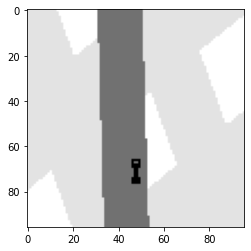

In [7]:
from matplotlib import pyplot as plt
plt.imshow(obs[0,:,:,0], cmap='gray')
print(min([min(r) for r in obs[0,:,:,0]]), max([max(r) for r in obs[0,:,:,0]]))

In [8]:
env0.close()

In [9]:
from stable_baselines.common.policies import MlpPolicy, CnnPolicy, CnnLstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common import make_vec_env
from stable_baselines import PPO2 #, PPO1


In [10]:
#training env
frames=4

if __name__=='__main__':
    env1 = lambda :  CarRacing(
        grayscale=2,
        show_info_panel=0,
        discretize_actions="hard",
        frames_per_state=frames,
        num_lanes=1,
        num_tracks=1,
        max_time_out=1.0,
        max_step_reward=1,
        allow_outside=True,
        )


In [11]:
# multiprocess environment
paralelo=1

if paralelo==1:
    env1 = DummyVecEnv([env1])
    #env1 = gym.make(env1)
else:
    env1 = make_vec_env(env1, n_envs=paralelo)

obs = env1.reset()
print(obs.shape)

Track generation: 1105..1392 -> 287-tiles track
(1, 96, 96, 4)


In [12]:
updates=1000

batch=400
model = PPO2(CnnPolicy, env1, verbose=1, n_steps=batch, n_cpu_tf_sess=2)
    #, max_grad_norm=1, nminibatches=paralelo)

model.learn(total_timesteps=updates*batch*paralelo)


Track generation: 1195..1508 -> 313-tiles track
done by time
Track generation: 1348..1689 -> 341-tiles track
done by time
Track generation: 1084..1364 -> 280-tiles track
done by time
Track generation: 981..1237 -> 256-tiles track
done by time
Track generation: 1086..1366 -> 280-tiles track
done by time
Track generation: 1116..1399 -> 283-tiles track
done by time
Track generation: 1191..1493 -> 302-tiles track
done by time
Track generation: 1060..1336 -> 276-tiles track
done by time
Track generation: 995..1248 -> 253-tiles track
done by time
Track generation: 1191..1501 -> 310-tiles track
done by time
Track generation: 1246..1565 -> 319-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1327..1663 -> 336-tiles track
done by time
Track generation: 1063..1337 -> 274-tiles track
done by time
Track generation: 1335..1673 -> 338-tiles track
done by time
Track generation: 1076..1354 -> 278-tiles track
done by time
Track generation: 1127..1420

done by time
Track generation: 961..1213 -> 252-tiles track
done by time
Track generation: 1103..1381 -> 278-tiles track
done by time
Track generation: 1028..1289 -> 261-tiles track
done by time
Track generation: 1233..1545 -> 312-tiles track
done by time
Track generation: 1083..1358 -> 275-tiles track
done by time
Track generation: 1156..1456 -> 300-tiles track
done by time
Track generation: 1253..1570 -> 317-tiles track
done by time
Track generation: 1136..1424 -> 288-tiles track
done by time
Track generation: 1231..1543 -> 312-tiles track
done by time
Track generation: 1063..1333 -> 270-tiles track
done by time
Track generation: 1040..1304 -> 264-tiles track
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1236..1549 -> 313-tiles track
done by time
Track generation: 1254..1572 -> 318-tiles track
-------------------------------------
| approxkl           | 0.003391138  |
| clipfrac           | 0.026250001  |
| explained_variance | -0.00218  

---------------------------------------
| approxkl           | 0.0010180061   |
| clipfrac           | 0.0            |
| explained_variance | 0.000426       |
| fps                | 13             |
| n_updates          | 11             |
| policy_entropy     | 1.5058998      |
| policy_loss        | -2.0219537e-05 |
| serial_timesteps   | 4400           |
| time_elapsed       | 308            |
| total_timesteps    | 4400           |
| value_loss         | 1267.4735      |
---------------------------------------
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1143..1433 -> 290-tiles track
done by time
Track generation: 1026..1289 -> 263-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1247..1568 -> 321-tiles track
done by time
Track generation: 1185..1485 -> 300-tiles track
done by time
Track generation: 1223..1533 -> 310-tiles track
done by time
Track generation: 1038..1309 -> 271-tiles 

done by time
Track generation: 1097..1382 -> 285-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
--------------------------------------
| approxkl           | 0.00075271516 |
| clipfrac           | 0.000625      |
| explained_variance | 0.0792        |
| fps                | 25            |
| n_updates          | 20            |
| policy_entropy     | 1.3966782     |
| policy_loss        | -0.0031372583 |
| serial_timesteps   | 8000          |
| time_elapsed       | 509           |
| total_timesteps    | 8000          |
| value_loss         | 113.09408     |
--------------------------------------
done by time
Track generation: 1136..1432 -> 296-tiles track
done by time
Track generation: 1180..1485 -> 305-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
-------------------------------------
| approxkl           | 0.004091514  |
| clipfrac           | 0.011875001  |
| explained_variance | 0.0431       |
| fps                | 24           

done by time
Track generation: 1113..1407 -> 294-tiles track
--------------------------------------
| approxkl           | 0.001205805   |
| clipfrac           | 0.00125       |
| explained_variance | -0.0805       |
| fps                | 20            |
| n_updates          | 33            |
| policy_entropy     | 1.2923623     |
| policy_loss        | -0.0037566558 |
| serial_timesteps   | 13200         |
| time_elapsed       | 702           |
| total_timesteps    | 13200         |
| value_loss         | 495.22366     |
--------------------------------------
done by time
Track generation: 1188..1489 -> 301-tiles track
done by time
Track generation: 1181..1480 -> 299-tiles track
done by time
Track generation: 957..1200 -> 243-tiles track
done by time
Track generation: 1161..1457 -> 296-tiles track
done by time
Track generation: 1274..1597 -> 323-tiles track
done by time
Track generation: 1155..1456 -> 301-tiles track
done by time
Track generation: 1063..1339 -> 276-tiles track
done b

done by time
Track generation: 1210..1517 -> 307-tiles track
done by time
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1322..1657 -> 335-tiles track
done by time
Track generation: 1222..1528 -> 306-tiles track
--------------------------------------
| approxkl           | 0.0046618627  |
| clipfrac           | 0.055625      |
| explained_variance | 0.0741        |
| fps                | 14            |
| n_updates          | 41            |
| policy_entropy     | 1.1558452     |
| policy_loss        | -0.0005422704 |
| serial_timesteps   | 16400         |
| time_elapsed       | 876           |
| total_timesteps    | 16400         |
| value_loss         | 738.8164      |
--------------------------------------
done by time
Track generation: 1110..1392 -> 282-tiles track
done by time
Track generation: 1162..1456 -> 294-tiles track
done by time
Track generation: 1087..1365 -> 278-tiles track
retry to generate track (normal if there are not many of this mess

done by time
Track generation: 1202..1507 -> 305-tiles track
done by time
Track generation: 1067..1338 -> 271-tiles track
done by time
Track generation: 1162..1491 -> 329-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1248..1564 -> 316-tiles track
-------------------------------------
| approxkl           | 0.010903105  |
| clipfrac           | 0.18         |
| explained_variance | 0.19         |
| fps                | 20           |
| n_updates          | 52           |
| policy_entropy     | 1.2054918    |
| policy_loss        | 0.0020545465 |
| serial_timesteps   | 20800        |
| time_elapsed       | 1.07e+03     |
| total_timesteps    | 20800        |
| value_loss         | 300.65393    |
-------------------------------------
done by time
Track generation: 1062..1335 -> 273-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1157..1451 -> 294-tiles track
done by time
Track gen

done by time
Track generation: 1065..1341 -> 276-tiles track
done by time
Track generation: 1208..1514 -> 306-tiles track
---------------------------------------
| approxkl           | 0.006318087    |
| clipfrac           | 0.052499995    |
| explained_variance | 0.139          |
| fps                | 17             |
| n_updates          | 61             |
| policy_entropy     | 1.0176147      |
| policy_loss        | -0.00019941787 |
| serial_timesteps   | 24400          |
| time_elapsed       | 1.25e+03       |
| total_timesteps    | 24400          |
| value_loss         | 360.8477       |
---------------------------------------
done by time
Track generation: 1275..1598 -> 323-tiles track
done by time
Track generation: 1110..1391 -> 281-tiles track
-------------------------------------
| approxkl           | 0.0021913766 |
| clipfrac           | 0.01         |
| explained_variance | 0.852        |
| fps                | 25           |
| n_updates          | 62           |
| policy

--------------------------------------
| approxkl           | 0.002050937   |
| clipfrac           | 0.00125       |
| explained_variance | 0.64          |
| fps                | 21            |
| n_updates          | 72            |
| policy_entropy     | 1.0657122     |
| policy_loss        | -0.0043577226 |
| serial_timesteps   | 28800         |
| time_elapsed       | 1.44e+03      |
| total_timesteps    | 28800         |
| value_loss         | 96.24155      |
--------------------------------------
done by time
Track generation: 916..1154 -> 238-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1022..1290 -> 268-tiles track
done by time
Track generation: 1055..1323 -> 268-tiles track
--------------------------------------
| approxkl           | 0.005290282   |
| clipfrac           | 0.030000001   |
| explained_variance | 0.842         |
| fps                | 26            |
| n_updates          | 73            |
| policy_entropy  

------------------------------------
| approxkl           | 0.030730702 |
| clipfrac           | 0.35875002  |
| explained_variance | 0.599       |
| fps                | 25          |
| n_updates          | 85          |
| policy_entropy     | 0.8242988   |
| policy_loss        | 0.008028471 |
| serial_timesteps   | 34000       |
| time_elapsed       | 1.65e+03    |
| total_timesteps    | 34000       |
| value_loss         | 65.732254   |
------------------------------------
done by time
Track generation: 1152..1444 -> 292-tiles track
done by time
Track generation: 951..1197 -> 246-tiles track
done by time
Track generation: 1132..1419 -> 287-tiles track
done by time
Track generation: 1175..1473 -> 298-tiles track
-------------------------------------
| approxkl           | 0.0030317213 |
| clipfrac           | 0.041875     |
| explained_variance | 0.815        |
| fps                | 22           |
| n_updates          | 86           |
| policy_entropy     | 0.94176257   |
| policy_l

done by time
Track generation: 1240..1554 -> 314-tiles track
---------------------------------------
| approxkl           | 0.015313059    |
| clipfrac           | 0.2125         |
| explained_variance | 0.765          |
| fps                | 23             |
| n_updates          | 97             |
| policy_entropy     | 0.9163653      |
| policy_loss        | -0.00067624287 |
| serial_timesteps   | 38800          |
| time_elapsed       | 1.85e+03       |
| total_timesteps    | 38800          |
| value_loss         | 51.95427       |
---------------------------------------
done by time
Track generation: 1075..1348 -> 273-tiles track
done by time
Track generation: 1312..1644 -> 332-tiles track
done by time
Track generation: 1105..1385 -> 280-tiles track
------------------------------------
| approxkl           | 0.010146585 |
| clipfrac           | 0.12125     |
| explained_variance | 0.883       |
| fps                | 23          |
| n_updates          | 98          |
| policy_entro

done by time
Track generation: 1304..1634 -> 330-tiles track
done by time
Track generation: 1091..1368 -> 277-tiles track
done by time
Track generation: 1212..1519 -> 307-tiles track
--------------------------------------
| approxkl           | 0.013521588   |
| clipfrac           | 0.22625       |
| explained_variance | 0.888         |
| fps                | 23            |
| n_updates          | 110           |
| policy_entropy     | 0.9449814     |
| policy_loss        | -0.0060568997 |
| serial_timesteps   | 44000         |
| time_elapsed       | 2.05e+03      |
| total_timesteps    | 44000         |
| value_loss         | 17.478539     |
--------------------------------------
done by time
Track generation: 1386..1737 -> 351-tiles track
-------------------------------------
| approxkl           | 0.013896724  |
| clipfrac           | 0.259375     |
| explained_variance | 0.611        |
| fps                | 26           |
| n_updates          | 111          |
| policy_entropy     

done by time
Track generation: 990..1243 -> 253-tiles track
done by time
Track generation: 1070..1349 -> 279-tiles track
-------------------------------------
| approxkl           | 0.003742053  |
| clipfrac           | 0.026875     |
| explained_variance | 0.893        |
| fps                | 27           |
| n_updates          | 123          |
| policy_entropy     | 0.93783134   |
| policy_loss        | 0.0020822368 |
| serial_timesteps   | 49200        |
| time_elapsed       | 2.26e+03     |
| total_timesteps    | 49200        |
| value_loss         | 21.53529     |
-------------------------------------
done by time
Track generation: 1165..1467 -> 302-tiles track
done by time
Track generation: 1039..1307 -> 268-tiles track
done by time
Track generation: 1217..1525 -> 308-tiles track
-------------------------------------
| approxkl           | 0.009317793  |
| clipfrac           | 0.15062499   |
| explained_variance | 0.879        |
| fps                | 24           |
| n_updates 

done by time
Track generation: 945..1196 -> 251-tiles track
done by time
Track generation: 1177..1485 -> 308-tiles track
done by time
Track generation: 1267..1588 -> 321-tiles track
------------------------------------
| approxkl           | 0.020389035 |
| clipfrac           | 0.28375     |
| explained_variance | 0.905       |
| fps                | 24          |
| n_updates          | 136         |
| policy_entropy     | 0.8899317   |
| policy_loss        | 0.011890248 |
| serial_timesteps   | 54400       |
| time_elapsed       | 2.46e+03    |
| total_timesteps    | 54400       |
| value_loss         | 28.82402    |
------------------------------------
done by time
Track generation: 1133..1420 -> 287-tiles track
done by time
Track generation: 1060..1329 -> 269-tiles track
done by time
Track generation: 1159..1453 -> 294-tiles track
-------------------------------------
| approxkl           | 0.0080589745 |
| clipfrac           | 0.131875     |
| explained_variance | 0.943        |
| 

done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generation: 1340..1687 -> 347-tiles track
--------------------------------------
| approxkl           | 0.011801916   |
| clipfrac           | 0.1325        |
| explained_variance | 0.941         |
| fps                | 25            |
| n_updates          | 149           |
| policy_entropy     | 0.9129308     |
| policy_loss        | -0.0021607222 |
| serial_timesteps   | 59600         |
| time_elapsed       | 2.66e+03      |
| total_timesteps    | 59600         |
| value_loss         | 19.384398     |
--------------------------------------
done by time
Track generation: 1112..1404 -> 292-tiles track
done by time
Track generation: 1003..1263 -> 260-tiles track
done by time
Track generation: 1294..1621 -> 327-tiles track
------------------------------------
| approxkl           | 0.00939148  |
| clipfrac           | 0.154375    |
| explained_variance | 0.954       |
| fps                | 24          |
| n

done by time
Track generation: 1109..1390 -> 281-tiles track
done by time
Track generation: 1064..1334 -> 270-tiles track
--------------------------------------
| approxkl           | 0.0054295394  |
| clipfrac           | 0.063125      |
| explained_variance | 0.936         |
| fps                | 26            |
| n_updates          | 162           |
| policy_entropy     | 1.0603359     |
| policy_loss        | -0.0018527529 |
| serial_timesteps   | 64800         |
| time_elapsed       | 2.87e+03      |
| total_timesteps    | 64800         |
| value_loss         | 18.03103      |
--------------------------------------
done by time
Track generation: 1177..1475 -> 298-tiles track
--------------------------------------
| approxkl           | 0.0043964256  |
| clipfrac           | 0.05625       |
| explained_variance | 0.943         |
| fps                | 28            |
| n_updates          | 163           |
| policy_entropy     | 1.0194424     |
| policy_loss        | -0.0016402174 

-------------------------------------
| approxkl           | 0.019833867  |
| clipfrac           | 0.171875     |
| explained_variance | 0.344        |
| fps                | 31           |
| n_updates          | 175          |
| policy_entropy     | 0.79099786   |
| policy_loss        | 0.0073058493 |
| serial_timesteps   | 70000        |
| time_elapsed       | 3.07e+03     |
| total_timesteps    | 70000        |
| value_loss         | 46.232517    |
-------------------------------------
done by time
Track generation: 1182..1482 -> 300-tiles track
done by time
Track generation: 1149..1450 -> 301-tiles track
done by time
Track generation: 1319..1653 -> 334-tiles track
------------------------------------
| approxkl           | 0.010291166 |
| clipfrac           | 0.09375     |
| explained_variance | 0.883       |
| fps                | 22          |
| n_updates          | 176         |
| policy_entropy     | 0.8263662   |
| policy_loss        | 0.004094594 |
| serial_timesteps   | 7040

done by time
Track generation: 1094..1376 -> 282-tiles track
--------------------------------------
| approxkl           | 0.0076145814  |
| clipfrac           | 0.125625      |
| explained_variance | 0.874         |
| fps                | 24            |
| n_updates          | 188           |
| policy_entropy     | 0.5916081     |
| policy_loss        | -0.0044259788 |
| serial_timesteps   | 75200         |
| time_elapsed       | 3.27e+03      |
| total_timesteps    | 75200         |
| value_loss         | 25.88264      |
--------------------------------------
done by time
Track generation: 1265..1585 -> 320-tiles track
done by time
Track generation: 1121..1412 -> 291-tiles track
-------------------------------------
| approxkl           | 0.013525047  |
| clipfrac           | 0.20312499   |
| explained_variance | 0.866        |
| fps                | 24           |
| n_updates          | 189          |
| policy_entropy     | 0.70728785   |
| policy_loss        | 0.0036148527 |
| seri

done by time
Track generation: 1236..1549 -> 313-tiles track
done by time
Track generation: 1199..1503 -> 304-tiles track
done by time
Track generation: 1235..1548 -> 313-tiles track
--------------------------------------
| approxkl           | 0.0011951453  |
| clipfrac           | 0.0043749996  |
| explained_variance | 0.929         |
| fps                | 23            |
| n_updates          | 201           |
| policy_entropy     | 0.46147025    |
| policy_loss        | 0.00019897668 |
| serial_timesteps   | 80400         |
| time_elapsed       | 3.47e+03      |
| total_timesteps    | 80400         |
| value_loss         | 21.931284     |
--------------------------------------
done by time
Track generation: 1273..1595 -> 322-tiles track
done by time
Track generation: 1195..1501 -> 306-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1019..1278 -> 259-tiles track
--------------------------------------
| approxkl           | 0.0063

done by time
Track generation: 1076..1354 -> 278-tiles track
done by time
Track generation: 1095..1381 -> 286-tiles track
------------------------------------
| approxkl           | 0.002248217 |
| clipfrac           | 0.025625    |
| explained_variance | 0.932       |
| fps                | 26          |
| n_updates          | 214         |
| policy_entropy     | 0.2203602   |
| policy_loss        | 0.003090288 |
| serial_timesteps   | 85600       |
| time_elapsed       | 3.67e+03    |
| total_timesteps    | 85600       |
| value_loss         | 22.510841   |
------------------------------------
done by time
Track generation: 1176..1473 -> 297-tiles track
-------------------------------------
| approxkl           | 0.002916654  |
| clipfrac           | 0.030624999  |
| explained_variance | 0.769        |
| fps                | 28           |
| n_updates          | 215          |
| policy_entropy     | 0.5389657    |
| policy_loss        | 0.0020304087 |
| serial_timesteps   | 86000    

done by time
Track generation: 983..1236 -> 253-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1120..1412 -> 292-tiles track
done by time
Track generation: 1099..1378 -> 279-tiles track
done by time
Track generation: 1244..1559 -> 315-tiles track
-------------------------------------
| approxkl           | 0.004551077  |
| clipfrac           | 0.039375     |
| explained_variance | 0.865        |
| fps                | 21           |
| n_updates          | 227          |
| policy_entropy     | 0.21875834   |
| policy_loss        | -0.005371644 |
| serial_timesteps   | 90800        |
| time_elapsed       | 3.87e+03     |
| total_timesteps    | 90800        |
| value_loss         | 40.412724    |
-------------------------------------
done by time
Track generation: 1022..1287 -> 265-tiles track
done by time
Track generation: 1001..1255 -> 254-tiles track
--------------------------------------
| approxkl           | 0.00730859    |
| cl

done by time
Track generation: 1251..1568 -> 317-tiles track
done by time
Track generation: 1175..1473 -> 298-tiles track
--------------------------------------
| approxkl           | 0.0025607185  |
| clipfrac           | 0.02875       |
| explained_variance | 0.959         |
| fps                | 23            |
| n_updates          | 239           |
| policy_entropy     | 0.36716202    |
| policy_loss        | -0.0020364206 |
| serial_timesteps   | 95600         |
| time_elapsed       | 4.07e+03      |
| total_timesteps    | 95600         |
| value_loss         | 16.356918     |
--------------------------------------
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 1211..1518 -> 307-tiles track
done by time
Track generation: 1164..1459 -> 295-tiles track
-------------------------------------
| approxkl           | 0.0028067378 |
| clipfrac           | 0.040625     |
| explained_variance | 0.927        |
| fps                | 20           

done by time
Track generation: 967..1220 -> 253-tiles track
done by time
Track generation: 1180..1485 -> 305-tiles track
done by time
Track generation: 1132..1419 -> 287-tiles track
--------------------------------------
| approxkl           | 0.0014582159  |
| clipfrac           | 0.019375      |
| explained_variance | 0.827         |
| fps                | 21            |
| n_updates          | 252           |
| policy_entropy     | 0.30498323    |
| policy_loss        | -0.0035580967 |
| serial_timesteps   | 100800        |
| time_elapsed       | 4.3e+03       |
| total_timesteps    | 100800        |
| value_loss         | 51.925205     |
--------------------------------------
done by time
Track generation: 1093..1370 -> 277-tiles track
done by time
Track generation: 1164..1461 -> 297-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1083..1358 -> 275-tiles track
---------------------------------------
| approxkl           | 0.0039

done by time
Track generation: 1068..1339 -> 271-tiles track
done by time
Track generation: 1116..1399 -> 283-tiles track
done by time
Track generation: 1039..1303 -> 264-tiles track
done by time
Track generation: 1259..1578 -> 319-tiles track
---------------------------------------
| approxkl           | 0.0009115926   |
| clipfrac           | 0.009375       |
| explained_variance | -0.109         |
| fps                | 15             |
| n_updates          | 264            |
| policy_entropy     | 0.29929024     |
| policy_loss        | -0.00020157007 |
| serial_timesteps   | 105600         |
| time_elapsed       | 4.51e+03       |
| total_timesteps    | 105600         |
| value_loss         | 209.46478      |
---------------------------------------
done by time
Track generation: 1292..1619 -> 327-tiles track
done by time
Track generation: 1199..1503 -> 304-tiles track
done by time
Track generation: 1161..1465 -> 304-tiles track
done by time
Track generation: 1389..1740 -> 351-tile

done by time
Track generation: 1114..1405 -> 291-tiles track
done by time
Track generation: 1055..1323 -> 268-tiles track
done by time
Track generation: 1146..1442 -> 296-tiles track
---------------------------------------
| approxkl           | 0.0033357465   |
| clipfrac           | 0.049374998    |
| explained_variance | 0.687          |
| fps                | 23             |
| n_updates          | 275            |
| policy_entropy     | 0.37056124     |
| policy_loss        | -0.00054712396 |
| serial_timesteps   | 110000         |
| time_elapsed       | 4.72e+03       |
| total_timesteps    | 110000         |
| value_loss         | 59.47335       |
---------------------------------------
done by time
Track generation: 1000..1254 -> 254-tiles track
done by time
Track generation: 1272..1594 -> 322-tiles track
done by time
Track generation: 1015..1278 -> 263-tiles track
--------------------------------------
| approxkl           | 0.0059170295  |
| clipfrac           | 0.043125     

done by time
Track generation: 991..1251 -> 260-tiles track
done by time
Track generation: 1337..1675 -> 338-tiles track
done by time
Track generation: 1060..1329 -> 269-tiles track
--------------------------------------
| approxkl           | 0.0036931995  |
| clipfrac           | 0.058125004   |
| explained_variance | 0.816         |
| fps                | 24            |
| n_updates          | 288           |
| policy_entropy     | 0.50039506    |
| policy_loss        | 0.00095673976 |
| serial_timesteps   | 115200        |
| time_elapsed       | 4.94e+03      |
| total_timesteps    | 115200        |
| value_loss         | 46.62912      |
--------------------------------------
done by time
Track generation: 1128..1412 -> 284-tiles track
done by time
Track generation: 863..1088 -> 225-tiles track
--------------------------------------
| approxkl           | 0.0015134302  |
| clipfrac           | 0.018125001   |
| explained_variance | 0.922         |
| fps                | 27         

done by time
Track generation: 1196..1499 -> 303-tiles track
done by time
Track generation: 1135..1423 -> 288-tiles track
--------------------------------------
| approxkl           | 0.0038418423  |
| clipfrac           | 0.058749996   |
| explained_variance | 0.944         |
| fps                | 26            |
| n_updates          | 301           |
| policy_entropy     | 0.56598186    |
| policy_loss        | -0.0022467081 |
| serial_timesteps   | 120400        |
| time_elapsed       | 5.15e+03      |
| total_timesteps    | 120400        |
| value_loss         | 20.57392      |
--------------------------------------
done by time
Track generation: 1100..1379 -> 279-tiles track
done by time
Track generation: 1225..1535 -> 310-tiles track
done by time
Track generation: 1055..1323 -> 268-tiles track
-------------------------------------
| approxkl           | 0.008739894  |
| clipfrac           | 0.110625006  |
| explained_variance | 0.832        |
| fps                | 24           

--------------------------------------
| approxkl           | 0.006545919   |
| clipfrac           | 0.076875      |
| explained_variance | 0.852         |
| fps                | 30            |
| n_updates          | 313           |
| policy_entropy     | 0.8318059     |
| policy_loss        | -0.0077500613 |
| serial_timesteps   | 125200        |
| time_elapsed       | 5.34e+03      |
| total_timesteps    | 125200        |
| value_loss         | 32.087345     |
--------------------------------------
done by time
Track generation: 1153..1445 -> 292-tiles track
--------------------------------------
| approxkl           | 0.01888132    |
| clipfrac           | 0.21499999    |
| explained_variance | 0.952         |
| fps                | 29            |
| n_updates          | 314           |
| policy_entropy     | 0.8148744     |
| policy_loss        | -0.0070349015 |
| serial_timesteps   | 125600        |
| time_elapsed       | 5.35e+03      |
| total_timesteps    | 125600        |
| v

done by time
Track generation: 1279..1603 -> 324-tiles track
done by time
Track generation: 1271..1593 -> 322-tiles track
-------------------------------------
| approxkl           | 0.007151005  |
| clipfrac           | 0.110625     |
| explained_variance | 0.928        |
| fps                | 25           |
| n_updates          | 326          |
| policy_entropy     | 0.6762449    |
| policy_loss        | 0.0016161981 |
| serial_timesteps   | 130400       |
| time_elapsed       | 5.54e+03     |
| total_timesteps    | 130400       |
| value_loss         | 23.019228    |
-------------------------------------
done by time
Track generation: 1073..1346 -> 273-tiles track
--------------------------------------
| approxkl           | 0.005544183   |
| clipfrac           | 0.10812501    |
| explained_variance | 0.916         |
| fps                | 27            |
| n_updates          | 327           |
| policy_entropy     | 0.6620575     |
| policy_loss        | -0.0021422259 |
| serial_ti

done by time
Track generation: 1263..1583 -> 320-tiles track
------------------------------------
| approxkl           | 0.012394155 |
| clipfrac           | 0.13999999  |
| explained_variance | 0.935       |
| fps                | 28          |
| n_updates          | 340         |
| policy_entropy     | 0.7337591   |
| policy_loss        | 0.00810295  |
| serial_timesteps   | 136000      |
| time_elapsed       | 5.75e+03    |
| total_timesteps    | 136000      |
| value_loss         | 23.54291    |
------------------------------------
done by time
Track generation: 1161..1464 -> 303-tiles track
done by time
Track generation: 1099..1378 -> 279-tiles track
done by time
Track generation: 946..1192 -> 246-tiles track
------------------------------------
| approxkl           | 0.020050485 |
| clipfrac           | 0.25312498  |
| explained_variance | 0.876       |
| fps                | 24          |
| n_updates          | 341         |
| policy_entropy     | 0.78511584  |
| policy_loss    

done by time
Track generation: 1192..1504 -> 312-tiles track
------------------------------------
| approxkl           | 0.050079133 |
| clipfrac           | 0.393125    |
| explained_variance | -0.143      |
| fps                | 28          |
| n_updates          | 355         |
| policy_entropy     | 1.194087    |
| policy_loss        | 0.02220181  |
| serial_timesteps   | 142000      |
| time_elapsed       | 5.96e+03    |
| total_timesteps    | 142000      |
| value_loss         | 75.82678    |
------------------------------------
done by time
Track generation: 1067..1339 -> 272-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1132..1420 -> 288-tiles track
done by time
Track generation: 1128..1422 -> 294-tiles track
------------------------------------
| approxkl           | 0.04277992  |
| clipfrac           | 0.34812498  |
| explained_variance | 0.0455      |
| fps                | 26          |
| n_updates          | 356     

-------------------------------------
| approxkl           | 0.010594942  |
| clipfrac           | 0.128125     |
| explained_variance | 0.834        |
| fps                | 27           |
| n_updates          | 368          |
| policy_entropy     | 0.6882528    |
| policy_loss        | -0.005295745 |
| serial_timesteps   | 147200       |
| time_elapsed       | 6.16e+03     |
| total_timesteps    | 147200       |
| value_loss         | 30.803982    |
-------------------------------------
done by time
Track generation: 1430..1792 -> 362-tiles track
done by time
Track generation: 1186..1488 -> 302-tiles track
--------------------------------------
| approxkl           | 0.010560342   |
| clipfrac           | 0.126875      |
| explained_variance | 0.47          |
| fps                | 24            |
| n_updates          | 369           |
| policy_entropy     | 0.76919144    |
| policy_loss        | 0.00072500895 |
| serial_timesteps   | 147600        |
| time_elapsed       | 6.18e+03  

done by time
Track generation: 1144..1434 -> 290-tiles track
-----------------------------------
| approxkl           | 0.05122831 |
| clipfrac           | 0.38625002 |
| explained_variance | 0.783      |
| fps                | 28         |
| n_updates          | 382        |
| policy_entropy     | 0.67434496 |
| policy_loss        | 0.02096008 |
| serial_timesteps   | 152800     |
| time_elapsed       | 6.37e+03   |
| total_timesteps    | 152800     |
| value_loss         | 35.464817  |
-----------------------------------
--------------------------------------
| approxkl           | 0.012329883   |
| clipfrac           | 0.221875      |
| explained_variance | -0.398        |
| fps                | 31            |
| n_updates          | 383           |
| policy_entropy     | 0.9187456     |
| policy_loss        | -0.0032133567 |
| serial_timesteps   | 153200        |
| time_elapsed       | 6.39e+03      |
| total_timesteps    | 153200        |
| value_loss         | 13.181556     |
---

done by time
Track generation: 1243..1565 -> 322-tiles track
--------------------------------------
| approxkl           | 0.004474816   |
| clipfrac           | 0.0625        |
| explained_variance | 0.707         |
| fps                | 28            |
| n_updates          | 397           |
| policy_entropy     | 0.6734963     |
| policy_loss        | -0.0065714275 |
| serial_timesteps   | 158800        |
| time_elapsed       | 6.59e+03      |
| total_timesteps    | 158800        |
| value_loss         | 54.8425       |
--------------------------------------
done by time
Track generation: 1215..1522 -> 307-tiles track
--------------------------------------
| approxkl           | 0.0066471547  |
| clipfrac           | 0.070625      |
| explained_variance | 0.65          |
| fps                | 28            |
| n_updates          | 398           |
| policy_entropy     | 0.5593651     |
| policy_loss        | -0.0026928398 |
| serial_timesteps   | 159200        |
| time_elapsed      

done by time
Track generation: 1314..1646 -> 332-tiles track
done by time
Track generation: 1283..1608 -> 325-tiles track
------------------------------------
| approxkl           | 0.017700993 |
| clipfrac           | 0.156875    |
| explained_variance | 0.591       |
| fps                | 24          |
| n_updates          | 411         |
| policy_entropy     | 0.9654086   |
| policy_loss        | 0.003974406 |
| serial_timesteps   | 164400      |
| time_elapsed       | 6.79e+03    |
| total_timesteps    | 164400      |
| value_loss         | 114.71872   |
------------------------------------
done by time
Track generation: 1107..1388 -> 281-tiles track
--------------------------------------
| approxkl           | 0.006212986   |
| clipfrac           | 0.084375      |
| explained_variance | 0.537         |
| fps                | 27            |
| n_updates          | 412           |
| policy_entropy     | 1.1372063     |
| policy_loss        | -0.0076470627 |
| serial_timesteps   | 1

done by time
Track generation: 1275..1598 -> 323-tiles track
done by time
Track generation: 1066..1347 -> 281-tiles track
--------------------------------------
| approxkl           | 0.003625248   |
| clipfrac           | 0.035         |
| explained_variance | 0.6           |
| fps                | 25            |
| n_updates          | 425           |
| policy_entropy     | 1.0596745     |
| policy_loss        | -0.0008483839 |
| serial_timesteps   | 170000        |
| time_elapsed       | 6.99e+03      |
| total_timesteps    | 170000        |
| value_loss         | 62.0031       |
--------------------------------------
done by time
Track generation: 1263..1583 -> 320-tiles track
done by time
Track generation: 1225..1542 -> 317-tiles track
done by time
Track generation: 1175..1473 -> 298-tiles track
done by time
Track generation: 1116..1407 -> 291-tiles track
done by time
Track generation: 1073..1353 -> 280-tiles track
-------------------------------------
| approxkl           | 0.009

-------------------------------------
| approxkl           | 0.0022358529 |
| clipfrac           | 0.021875     |
| explained_variance | 0.74         |
| fps                | 29           |
| n_updates          | 438          |
| policy_entropy     | 1.2443546    |
| policy_loss        | -0.005733493 |
| serial_timesteps   | 175200       |
| time_elapsed       | 7.19e+03     |
| total_timesteps    | 175200       |
| value_loss         | 30.160845    |
-------------------------------------
done by time
Track generation: 1113..1395 -> 282-tiles track
done by time
Track generation: 1123..1415 -> 292-tiles track
done by time
Track generation: 1280..1614 -> 334-tiles track
-------------------------------------
| approxkl           | 0.010987554  |
| clipfrac           | 0.215        |
| explained_variance | 0.158        |
| fps                | 24           |
| n_updates          | 439          |
| policy_entropy     | 1.3852497    |
| policy_loss        | -0.006238415 |
| serial_timesteps 

done by time
Track generation: 1202..1506 -> 304-tiles track
--------------------------------------
| approxkl           | 0.018618442   |
| clipfrac           | 0.21875       |
| explained_variance | 0.132         |
| fps                | 27            |
| n_updates          | 450           |
| policy_entropy     | 1.152686      |
| policy_loss        | -0.0021503288 |
| serial_timesteps   | 180000        |
| time_elapsed       | 7.38e+03      |
| total_timesteps    | 180000        |
| value_loss         | 74.242424     |
--------------------------------------
done by time
Track generation: 1078..1359 -> 281-tiles track
done by time
Track generation: 1194..1496 -> 302-tiles track
-------------------------------------
| approxkl           | 0.023894066  |
| clipfrac           | 0.36749995   |
| explained_variance | 0.632        |
| fps                | 26           |
| n_updates          | 451          |
| policy_entropy     | 1.3222423    |
| policy_loss        | 0.0155161545 |
| seri

done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
-------------------------------------
| approxkl           | 0.008637145  |
| clipfrac           | 0.16375001   |
| explained_variance | 0.33         |
| fps                | 26           |
| n_updates          | 464          |
| policy_entropy     | 0.9376279    |
| policy_loss        | 0.0054590213 |
| serial_timesteps   | 185600       |
| time_elapsed       | 7.59e+03     |
| total_timesteps    | 185600       |
| value_loss         | 138.85205    |
-------------------------------------
done by time
Track generation: 947..1196 -> 249-tiles track
done by time
Track generation: 1111..1391 -> 280-tiles track
-------------------------------------
| approxkl           | 0.0025298493 |
| clipfrac           | 0.015000001  |
| explained_variance | 0.894        |
| fps                | 27           |
| n_updates          | 465          |
| policy_entropy     | 0.8002028   

done by time
Track generation: 1144..1434 -> 290-tiles track
done by time
Track generation: 1175..1473 -> 298-tiles track
-------------------------------------
| approxkl           | 0.0016667144 |
| clipfrac           | 0.005        |
| explained_variance | 0.651        |
| fps                | 25           |
| n_updates          | 478          |
| policy_entropy     | 0.91006225   |
| policy_loss        | -0.003463796 |
| serial_timesteps   | 191200       |
| time_elapsed       | 7.8e+03      |
| total_timesteps    | 191200       |
| value_loss         | 83.00644     |
-------------------------------------
done by time
Track generation: 1274..1597 -> 323-tiles track
done by time
Track generation: 1080..1354 -> 274-tiles track
--------------------------------------
| approxkl           | 0.0027027635  |
| clipfrac           | 0.03125       |
| explained_variance | 0.565         |
| fps                | 26            |
| n_updates          | 479           |
| policy_entropy     | 0.793

done by time
Track generation: 1076..1356 -> 280-tiles track
done by time
Track generation: 1179..1477 -> 298-tiles track
-------------------------------------
| approxkl           | 0.002068176  |
| clipfrac           | 0.015        |
| explained_variance | 0.92         |
| fps                | 23           |
| n_updates          | 491          |
| policy_entropy     | 0.48803493   |
| policy_loss        | 0.0027561304 |
| serial_timesteps   | 196400       |
| time_elapsed       | 7.99e+03     |
| total_timesteps    | 196400       |
| value_loss         | 34.037178    |
-------------------------------------
done by time
Track generation: 1043..1308 -> 265-tiles track
--------------------------------------
| approxkl           | 0.0004994789  |
| clipfrac           | 0.0056249998  |
| explained_variance | 0.931         |
| fps                | 29            |
| n_updates          | 492           |
| policy_entropy     | 0.4188337     |
| policy_loss        | 0.00016206528 |
| serial_ti

done by time
Track generation: 1318..1652 -> 334-tiles track
done by time
Track generation: 1271..1593 -> 322-tiles track
-------------------------------------
| approxkl           | 0.0021100824 |
| clipfrac           | 0.008749999  |
| explained_variance | 0.803        |
| fps                | 25           |
| n_updates          | 504          |
| policy_entropy     | 0.76272976   |
| policy_loss        | 0.003069433  |
| serial_timesteps   | 201600       |
| time_elapsed       | 8.2e+03      |
| total_timesteps    | 201600       |
| value_loss         | 56.266014    |
-------------------------------------
done by time
Track generation: 1082..1355 -> 273-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1213..1520 -> 307-tiles track
done by time
Track generation: 1265..1585 -> 320-tiles track
---------------------------------------
| approxkl           | 0.0025985255   |
| clipfrac           | 0.023125       |
| explained_variance |

done by time
Track generation: 1148..1439 -> 291-tiles track
--------------------------------------
| approxkl           | 0.0014713167  |
| clipfrac           | 0.013125      |
| explained_variance | 0.863         |
| fps                | 29            |
| n_updates          | 518           |
| policy_entropy     | 0.69858325    |
| policy_loss        | -0.0003507028 |
| serial_timesteps   | 207200        |
| time_elapsed       | 8.4e+03       |
| total_timesteps    | 207200        |
| value_loss         | 17.651455     |
--------------------------------------
done by time
Track generation: 1267..1587 -> 320-tiles track
-------------------------------------
| approxkl           | 0.0051581655 |
| clipfrac           | 0.073125     |
| explained_variance | 0.947        |
| fps                | 28           |
| n_updates          | 519          |
| policy_entropy     | 0.7707811    |
| policy_loss        | 0.0011396161 |
| serial_timesteps   | 207600       |
| time_elapsed       | 8.42e+

done by time
Track generation: 1280..1604 -> 324-tiles track
done by time
Track generation: 1049..1321 -> 272-tiles track
done by time
Track generation: 1012..1269 -> 257-tiles track
--------------------------------------
| approxkl           | 0.00094896485 |
| clipfrac           | 0.005         |
| explained_variance | 0.766         |
| fps                | 24            |
| n_updates          | 531           |
| policy_entropy     | 0.6874769     |
| policy_loss        | 0.00075980107 |
| serial_timesteps   | 212400        |
| time_elapsed       | 8.6e+03       |
| total_timesteps    | 212400        |
| value_loss         | 85.29449      |
--------------------------------------
done by time
Track generation: 1095..1373 -> 278-tiles track
done by time
Track generation: 1039..1303 -> 264-tiles track
-------------------------------------
| approxkl           | 0.0042231567 |
| clipfrac           | 0.052500002  |
| explained_variance | 0.523        |
| fps                | 27           

done by time
Track generation: 1196..1500 -> 304-tiles track
done by time
Track generation: 1308..1639 -> 331-tiles track
done by time
Track generation: 1152..1444 -> 292-tiles track
------------------------------------
| approxkl           | 0.022016903 |
| clipfrac           | 0.21375002  |
| explained_variance | 0.498       |
| fps                | 23          |
| n_updates          | 543         |
| policy_entropy     | 0.66579324  |
| policy_loss        | 0.013901151 |
| serial_timesteps   | 217200      |
| time_elapsed       | 8.8e+03     |
| total_timesteps    | 217200      |
| value_loss         | 109.202415  |
------------------------------------
done by time
Track generation: 1076..1349 -> 273-tiles track
done by time
Track generation: 1064..1334 -> 270-tiles track
done by time
Track generation: 1019..1278 -> 259-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1176..1474 -> 298-tiles track
---------------------------------

done by time
Track generation: 1216..1524 -> 308-tiles track
done by time
Track generation: 1047..1313 -> 266-tiles track
-------------------------------------
| approxkl           | 0.011469865  |
| clipfrac           | 0.12         |
| explained_variance | 0.692        |
| fps                | 27           |
| n_updates          | 553          |
| policy_entropy     | 0.6114119    |
| policy_loss        | -0.003059983 |
| serial_timesteps   | 221200       |
| time_elapsed       | 8.98e+03     |
| total_timesteps    | 221200       |
| value_loss         | 42.18685     |
-------------------------------------
done by time
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1196..1507 -> 311-tiles track
done by time
Track generation: 1084..1365 -> 281-tiles track
done by time
Track generation: 1064..1339 -> 275-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1041..1313 -> 272-tiles track
done by time
Track g

done by time
Track generation: 1245..1560 -> 315-tiles track
done by time
Track generation: 1213..1520 -> 307-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1014..1271 -> 257-tiles track
--------------------------------------
| approxkl           | 0.0025996508  |
| clipfrac           | 0.03          |
| explained_variance | 0.883         |
| fps                | 22            |
| n_updates          | 564           |
| policy_entropy     | 0.55948275    |
| policy_loss        | 0.00046369107 |
| serial_timesteps   | 225600        |
| time_elapsed       | 9.17e+03      |
| total_timesteps    | 225600        |
| value_loss         | 35.55664      |
--------------------------------------
done by time
Track generation: 1281..1606 -> 325-tiles track
done by time
Track generation: 1094..1377 -> 283-tiles track
------------------------------------
| approxkl           | 0.004505003 |
| clipfrac           | 0.03125     |
| explained_vari

done by time
Track generation: 1285..1614 -> 329-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1035..1298 -> 263-tiles track
done by time
Track generation: 1095..1373 -> 278-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
done by time
Track generation: 1094..1372 -> 278-tiles track
---------------------------------------
| approxkl           | 0.001621751    |
| clipfrac           | 0.010625       |
| explained_variance | 0.8            |
| fps                | 19             |
| n_updates          | 574            |
| policy_entropy     | 0.649231       |
| policy_loss        | -0.00035158294 |
| serial_timesteps   | 229600         |
| time_elapsed       | 9.37e+03       |
| total_timesteps    | 229600         |
| value_loss         | 52.8537        |
---------------------------------------
done by time
Track generation: 1247..1563 -> 316-tiles track
done by time
Track generation: 1173..1475 -> 302-tiles 

done by time
Track generation: 1069..1340 -> 271-tiles track
done by time
Track generation: 905..1135 -> 230-tiles track
done by time
Track generation: 1052..1323 -> 271-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1362..1707 -> 345-tiles track
--------------------------------------
| approxkl           | 0.001955611   |
| clipfrac           | 0.01625       |
| explained_variance | 0.816         |
| fps                | 24            |
| n_updates          | 584           |
| policy_entropy     | 0.76507896    |
| policy_loss        | -0.0016246317 |
| serial_timesteps   | 233600        |
| time_elapsed       | 9.55e+03      |
| total_timesteps    | 233600        |
| value_loss         | 29.342808     |
--------------------------------------
done by time
Track generation: 1020..1278 -> 258-tiles track
done by time
Track generation: 969..1215 -> 246-tiles track
done by time
Track generation: 957..1207 -> 250-tiles track
----------

done by time
Track generation: 1117..1398 -> 281-tiles track
done by time
Track generation: 1196..1499 -> 303-tiles track
--------------------------------------
| approxkl           | 0.0030133035  |
| clipfrac           | 0.0375        |
| explained_variance | 0.94          |
| fps                | 26            |
| n_updates          | 597           |
| policy_entropy     | 0.3139362     |
| policy_loss        | -0.0011067574 |
| serial_timesteps   | 238800        |
| time_elapsed       | 9.75e+03      |
| total_timesteps    | 238800        |
| value_loss         | 32.91448      |
--------------------------------------
done by time
Track generation: 1230..1542 -> 312-tiles track
done by time
Track generation: 1144..1434 -> 290-tiles track
-------------------------------------
| approxkl           | 0.028469788  |
| clipfrac           | 0.2875       |
| explained_variance | 0.979        |
| fps                | 27           |
| n_updates          | 598          |
| policy_entropy     

done by time
Track generation: 1057..1325 -> 268-tiles track
done by time
Track generation: 1294..1622 -> 328-tiles track
--------------------------------------
| approxkl           | 0.0075167813  |
| clipfrac           | 0.095625006   |
| explained_variance | 0.5           |
| fps                | 26            |
| n_updates          | 610           |
| policy_entropy     | 0.710964      |
| policy_loss        | -0.0022525992 |
| serial_timesteps   | 244000        |
| time_elapsed       | 9.95e+03      |
| total_timesteps    | 244000        |
| value_loss         | 61.93423      |
--------------------------------------
done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1223..1533 -> 310-tiles track
--------------------------------------
| approxkl           | 0.007907001   |
| clipfrac           | 0.083124995   |
| explained_variance | 0.482         |
| fps                | 24       

done by time
Track generation: 1083..1358 -> 275-tiles track
done by time
Track generation: 1227..1538 -> 311-tiles track
done by time
Track generation: 1173..1470 -> 297-tiles track
--------------------------------------
| approxkl           | 0.00033445994 |
| clipfrac           | 0.0062499996  |
| explained_variance | 0.961         |
| fps                | 24            |
| n_updates          | 623           |
| policy_entropy     | 0.14981288    |
| policy_loss        | 0.0016313189  |
| serial_timesteps   | 249200        |
| time_elapsed       | 1.02e+04      |
| total_timesteps    | 249200        |
| value_loss         | 18.686138     |
--------------------------------------
done by time
Track generation: 1197..1500 -> 303-tiles track
done by time
Track generation: 1097..1376 -> 279-tiles track
done by time
Track generation: 1182..1486 -> 304-tiles track
---------------------------------------
| approxkl           | 0.0004191317   |
| clipfrac           | 0.0043749996   |
| expla

done by time
Track generation: 1015..1273 -> 258-tiles track
done by time
Track generation: 1196..1499 -> 303-tiles track
done by time
Track generation: 1189..1491 -> 302-tiles track
--------------------------------------
| approxkl           | 0.00031779695 |
| clipfrac           | 0.0037499997  |
| explained_variance | 0.963         |
| fps                | 24            |
| n_updates          | 635           |
| policy_entropy     | 0.073539995   |
| policy_loss        | 0.00039019273 |
| serial_timesteps   | 254000        |
| time_elapsed       | 1.04e+04      |
| total_timesteps    | 254000        |
| value_loss         | 10.179194     |
--------------------------------------
done by time
Track generation: 1219..1528 -> 309-tiles track
done by time
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1171..1468 -> 297-tiles track
--------------------------------------
| approxkl           | 0.00014466554 |
| clipfrac           | 0.0031249998  |
| explaine

done by time
Track generation: 959..1211 -> 252-tiles track
done by time
Track generation: 1152..1444 -> 292-tiles track
done by time
Track generation: 1259..1578 -> 319-tiles track
-------------------------------------
| approxkl           | 0.016860288  |
| clipfrac           | 0.030000001  |
| explained_variance | 0.949        |
| fps                | 24           |
| n_updates          | 647          |
| policy_entropy     | 0.11393209   |
| policy_loss        | 0.0063932445 |
| serial_timesteps   | 258800       |
| time_elapsed       | 1.05e+04     |
| total_timesteps    | 258800       |
| value_loss         | 18.713778    |
-------------------------------------
done by time
Track generation: 1238..1551 -> 313-tiles track
-------------------------------------
| approxkl           | 3.196039e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0.402        |
| fps                | 28           |
| n_updates          | 648          |
| policy_entropy     | 0.06374332  

done by time
Track generation: 1239..1554 -> 315-tiles track
---------------------------------------
| approxkl           | 2.2159535e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.303          |
| fps                | 28             |
| n_updates          | 659            |
| policy_entropy     | 0.07092269     |
| policy_loss        | -1.1870747e-05 |
| serial_timesteps   | 263600         |
| time_elapsed       | 1.07e+04       |
| total_timesteps    | 263600         |
| value_loss         | 43.571056      |
---------------------------------------
done by time
Track generation: 1124..1409 -> 285-tiles track
--------------------------------------
| approxkl           | 0.00013644305 |
| clipfrac           | 0.00125       |
| explained_variance | 0.678         |
| fps                | 29            |
| n_updates          | 660           |
| policy_entropy     | 0.04029592    |
| policy_loss        | -0.0003557432 |
| serial_timesteps   | 264000        |
| time_

--------------------------------------
| approxkl           | 0.00013920618 |
| clipfrac           | 0.00125       |
| explained_variance | 0.932         |
| fps                | 24            |
| n_updates          | 672           |
| policy_entropy     | 0.14247894    |
| policy_loss        | 0.0008791344  |
| serial_timesteps   | 268800        |
| time_elapsed       | 1.09e+04      |
| total_timesteps    | 268800        |
| value_loss         | 19.196238     |
--------------------------------------
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1095..1373 -> 278-tiles track
done by time
Track generation: 1084..1359 -> 275-tiles track
--------------------------------------
| approxkl           | 0.00011904202 |
| clipfrac           | 0.001875      |
| explained_variance | 0.946         |
| fps                | 24            |
| n_updates          | 673           |
| policy_entropy     | 0.12984014    |
| policy_loss        | 0.00018887654 

done by time
Track generation: 1316..1649 -> 333-tiles track
done by time
Track generation: 1224..1534 -> 310-tiles track
done by time
Track generation: 1296..1624 -> 328-tiles track
-------------------------------------
| approxkl           | 0.003206076  |
| clipfrac           | 0.048125     |
| explained_variance | 0.975        |
| fps                | 22           |
| n_updates          | 684          |
| policy_entropy     | 0.39060745   |
| policy_loss        | 0.0013832471 |
| serial_timesteps   | 273600       |
| time_elapsed       | 1.11e+04     |
| total_timesteps    | 273600       |
| value_loss         | 9.192917     |
-------------------------------------
done by time
Track generation: 1100..1388 -> 288-tiles track
---------------------------------------
| approxkl           | 0.0050147073   |
| clipfrac           | 0.058124993    |
| explained_variance | 0.963          |
| fps                | 27             |
| n_updates          | 685            |
| policy_entropy     |

done by time
Track generation: 1117..1405 -> 288-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
--------------------------------------
| approxkl           | 0.0019216657  |
| clipfrac           | 0.001875      |
| explained_variance | 0.209         |
| fps                | 24            |
| n_updates          | 697           |
| policy_entropy     | 0.7436336     |
| policy_loss        | -0.0010428926 |
| serial_timesteps   | 278800        |
| time_elapsed       | 1.13e+04      |
| total_timesteps    | 278800        |
| value_loss         | 139.7903      |
--------------------------------------
done by time
Track generation: 1188..1489 -> 301-tiles track
done by time
Track generation: 1220..1529 -> 309-tiles track
done by time
Track generation: 1023..1293 -> 270-tiles track
done by time
Track generation: 1069..1340 -> 271-tiles track
-------------------------------------
| approxkl           | 0.0017082533 |
| clipfrac           | 0.0056249998 |
| explained_v

done by time
Track generation: 1255..1573 -> 318-tiles track
done by time
Track generation: 1288..1614 -> 326-tiles track
--------------------------------------
| approxkl           | 0.003522954   |
| clipfrac           | 0.051249996   |
| explained_variance | 0.973         |
| fps                | 25            |
| n_updates          | 710           |
| policy_entropy     | 0.67485803    |
| policy_loss        | -0.0026569776 |
| serial_timesteps   | 284000        |
| time_elapsed       | 1.15e+04      |
| total_timesteps    | 284000        |
| value_loss         | 12.099142     |
--------------------------------------
done by time
Track generation: 1080..1355 -> 275-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1335..1673 -> 338-tiles track
done by time
Track generation: 1220..1529 -> 309-tiles track
--------------------------------------
| approxkl           | 0.0013450417  |
| clipfrac           | 0.0125        |
| explained_

done by time
Track generation: 1038..1307 -> 269-tiles track
done by time
Track generation: 950..1193 -> 243-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1016..1282 -> 266-tiles track
---------------------------------------
| approxkl           | 0.00023846404  |
| clipfrac           | 0.001875       |
| explained_variance | 0.99           |
| fps                | 27             |
| n_updates          | 723            |
| policy_entropy     | 0.61352646     |
| policy_loss        | -0.00010443592 |
| serial_timesteps   | 289200         |
| time_elapsed       | 1.17e+04       |
| total_timesteps    | 289200         |
| value_loss         | 5.0131273      |
---------------------------------------
done by time
Track generation: 1252..1561 -> 309-tiles track
done by time
Track generation: 1099..1381 -> 282-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 975..1232 -> 257-tiles trac

--------------------------------------
| approxkl           | 0.013904124   |
| clipfrac           | 0.151875      |
| explained_variance | 0.945         |
| fps                | 30            |
| n_updates          | 736           |
| policy_entropy     | 0.7426635     |
| policy_loss        | -0.0020329962 |
| serial_timesteps   | 294400        |
| time_elapsed       | 1.19e+04      |
| total_timesteps    | 294400        |
| value_loss         | 10.086335     |
--------------------------------------
done by time
Track generation: 1219..1528 -> 309-tiles track
done by time
Track generation: 1147..1438 -> 291-tiles track
------------------------------------
| approxkl           | 0.04245828  |
| clipfrac           | 0.591875    |
| explained_variance | 0.774       |
| fps                | 26          |
| n_updates          | 737         |
| policy_entropy     | 0.8881134   |
| policy_loss        | 0.024810227 |
| serial_timesteps   | 294800      |
| time_elapsed       | 1.19e+04    |
|

done by time
Track generation: 1112..1398 -> 286-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1168..1464 -> 296-tiles track
--------------------------------------
| approxkl           | 0.0037318496  |
| clipfrac           | 0.043124996   |
| explained_variance | 0.489         |
| fps                | 22            |
| n_updates          | 748           |
| policy_entropy     | 0.69279325    |
| policy_loss        | -0.0002514362 |
| serial_timesteps   | 299200        |
| time_elapsed       | 1.21e+04      |
| total_timesteps    | 299200        |
| value_loss         | 158.95338     |
--------------------------------------
done by time
Track generation: 1236..1552 -> 316-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1075..1348 -> 273-tiles track
done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1130..1423 -> 293-tiles track
---------

done by time
Track generation: 1115..1406 -> 291-tiles track
-------------------------------------
| approxkl           | 0.0075192526 |
| clipfrac           | 0.111250006  |
| explained_variance | 0.24         |
| fps                | 17           |
| n_updates          | 759          |
| policy_entropy     | 0.985493     |
| policy_loss        | -0.00349746  |
| serial_timesteps   | 303600       |
| time_elapsed       | 1.23e+04     |
| total_timesteps    | 303600       |
| value_loss         | 369.23596    |
-------------------------------------
done by time
Track generation: 1195..1498 -> 303-tiles track
done by time
Track generation: 1026..1293 -> 267-tiles track
done by time
Track generation: 1047..1313 -> 266-tiles track
done by time
Track generation: 1171..1468 -> 297-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1096..1380 -> 284-tiles track
done by time
Track generation: 1163..1458 -> 295-tiles track
done by time
Track

done by time
Track generation: 1045..1306 -> 261-tiles track
done by time
Track generation: 1211..1518 -> 307-tiles track
done by time
Track generation: 1195..1498 -> 303-tiles track
--------------------------------------
| approxkl           | 0.005471377   |
| clipfrac           | 0.06250001    |
| explained_variance | 0.825         |
| fps                | 24            |
| n_updates          | 770           |
| policy_entropy     | 0.73495716    |
| policy_loss        | 5.4348027e-05 |
| serial_timesteps   | 308000        |
| time_elapsed       | 1.25e+04      |
| total_timesteps    | 308000        |
| value_loss         | 44.118557     |
--------------------------------------
done by time
Track generation: 1224..1534 -> 310-tiles track
done by time
Track generation: 1078..1355 -> 277-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1040..1312 -> 272-tiles track
-------------------------------------
| approxkl           | 0.00733

done by time
Track generation: 1140..1429 -> 289-tiles track
done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1163..1467 -> 304-tiles track
-------------------------------------
| approxkl           | 0.0039759935 |
| clipfrac           | 0.068125     |
| explained_variance | 0.866        |
| fps                | 25           |
| n_updates          | 782          |
| policy_entropy     | 0.6298784    |
| policy_loss        | 0.002813545  |
| serial_timesteps   | 312800       |
| time_elapsed       | 1.27e+04     |
| total_timesteps    | 312800       |
| value_loss         | 63.36588     |
-------------------------------------
done by time
Track generation: 1131..1418 -> 287-tiles track
done by time
Track generation: 1288..1614 -> 326-tiles track
--------------------------------------
| approxkl           | 0.007002901   |
| clipfrac           | 0.13624999    |
| explained_variance | 0.834         |
| fps                | 27            |
| n_up

done by time
Track generation: 1182..1490 -> 308-tiles track
done by time
Track generation: 1097..1375 -> 278-tiles track
-------------------------------------
| approxkl           | 0.001960559  |
| clipfrac           | 0.02         |
| explained_variance | 0.813        |
| fps                | 21           |
| n_updates          | 793          |
| policy_entropy     | 0.51808137   |
| policy_loss        | 0.0012831341 |
| serial_timesteps   | 317200       |
| time_elapsed       | 1.29e+04     |
| total_timesteps    | 317200       |
| value_loss         | 59.36194     |
-------------------------------------
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1140..1429 -> 289-tiles track
--------------------------------------
| approxkl           | 0.00928973    |
| clipfrac           | 0.14500001    |
| explained_variance | 0.637         |
| fps                | 26            |
| n_up

done by time
Track generation: 1152..1444 -> 292-tiles track
done by time
Track generation: 1228..1539 -> 311-tiles track
------------------------------------
| approxkl           | 0.010366848 |
| clipfrac           | 0.13499999  |
| explained_variance | 0.83        |
| fps                | 28          |
| n_updates          | 805         |
| policy_entropy     | 0.50828946  |
| policy_loss        | 0.001328708 |
| serial_timesteps   | 322000      |
| time_elapsed       | 1.31e+04    |
| total_timesteps    | 322000      |
| value_loss         | 28.708076   |
------------------------------------
done by time
Track generation: 1228..1540 -> 312-tiles track
done by time
Track generation: 961..1209 -> 248-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1171..1468 -> 297-tiles track
done by time
Track generation: 1060..1329 -> 269-tiles track
------------------------------------
| approxkl           | 0.018158728 |
| clipfrac           

done by time
Track generation: 1264..1584 -> 320-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
-------------------------------------
| approxkl           | 0.0018883434 |
| clipfrac           | 0.031875     |
| explained_variance | 0.987        |
| fps                | 27           |
| n_updates          | 818          |
| policy_entropy     | 0.36873594   |
| policy_loss        | 0.0016167787 |
| serial_timesteps   | 327200       |
| time_elapsed       | 1.32e+04     |
| total_timesteps    | 327200       |
| value_loss         | 10.667309    |
-------------------------------------
done by time
Track generation: 1117..1403 -> 286-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1003..1259 -> 256-tiles track
done by time
Track generation: 1049..1321 -> 272-tiles track
--------------------------------------
| approxkl           | 0.00062876253 |
| clipfrac           | 0.0031249998  |
| explained_variance | 0.

done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1158..1451 -> 293-tiles track
done by time
Track generation: 1086..1369 -> 283-tiles track
------------------------------------
| approxkl           | 0.019251155 |
| clipfrac           | 0.17312498  |
| explained_variance | 0.633       |
| fps                | 25          |
| n_updates          | 831         |
| policy_entropy     | 0.5327301   |
| policy_loss        | 0.007681513 |
| serial_timesteps   | 332400      |
| time_elapsed       | 1.34e+04    |
| total_timesteps    | 332400      |
| value_loss         | 111.842     |
------------------------------------
------------------------------------
| approxkl           | 0.005412368 |
| clipfrac           | 0.084375    |
| explained_variance | 0.717       |
| fps                | 33          |
| n_updates          | 832         |
| policy_entropy     | 0.434545    |
| policy_loss        | 0.003733885 |
| serial_timesteps   | 332800      |
| t

done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1169..1465 -> 296-tiles track
--------------------------------------
| approxkl           | 0.0022060634  |
| clipfrac           | 0.034999996   |
| explained_variance | 0.981         |
| fps                | 27            |
| n_updates          | 843           |
| policy_entropy     | 0.35774502    |
| policy_loss        | -0.0029185007 |
| serial_timesteps   | 337200        |
| time_elapsed       | 1.36e+04      |
| total_timesteps    | 337200        |
| value_loss         | 6.902771      |
--------------------------------------
done by time
Track generation: 1159..1454 -> 295-tiles track
done by time
Track generation: 1174..1471 -> 297-tiles track
-------------------------------------
| approxkl           | 0.0007357297 |
| clipfrac           | 0.008125     |
| explained_variance | 0.98         |
| fps                | 27           |
| n_updates          | 844          |
| policy_entropy     

done by time
Track generation: 1118..1402 -> 284-tiles track
--------------------------------------
| approxkl           | 0.0024788848  |
| clipfrac           | 0.030625002   |
| explained_variance | 0.969         |
| fps                | 29            |
| n_updates          | 856           |
| policy_entropy     | 0.84719497    |
| policy_loss        | -0.0026939772 |
| serial_timesteps   | 342400        |
| time_elapsed       | 1.38e+04      |
| total_timesteps    | 342400        |
| value_loss         | 2.8725731     |
--------------------------------------
done by time
Track generation: 1118..1401 -> 283-tiles track
done by time
Track generation: 1109..1390 -> 281-tiles track
done by time
Track generation: 1153..1445 -> 292-tiles track
-------------------------------------
| approxkl           | 0.0038583488 |
| clipfrac           | 0.034374997  |
| explained_variance | 0.673        |
| fps                | 26           |
| n_updates          | 857          |
| policy_entropy     

done by time
Track generation: 1028..1297 -> 269-tiles track
done by time
Track generation: 1183..1491 -> 308-tiles track
-------------------------------------
| approxkl           | 0.012877647  |
| clipfrac           | 0.06750001   |
| explained_variance | 0.982        |
| fps                | 27           |
| n_updates          | 869          |
| policy_entropy     | 0.51139015   |
| policy_loss        | 0.0015761456 |
| serial_timesteps   | 347600       |
| time_elapsed       | 1.4e+04      |
| total_timesteps    | 347600       |
| value_loss         | 8.170581     |
-------------------------------------
done by time
Track generation: 1135..1429 -> 294-tiles track
-------------------------------------
| approxkl           | 0.005170658  |
| clipfrac           | 0.059999995  |
| explained_variance | 0.877        |
| fps                | 29           |
| n_updates          | 870          |
| policy_entropy     | 0.5538173    |
| policy_loss        | 0.0021055131 |
| serial_timesteps 

done by time
Track generation: 1097..1375 -> 278-tiles track
------------------------------------
| approxkl           | 0.014957916 |
| clipfrac           | 0.068124995 |
| explained_variance | 0.957       |
| fps                | 30          |
| n_updates          | 884         |
| policy_entropy     | 0.7774093   |
| policy_loss        | 0.01368934  |
| serial_timesteps   | 353600      |
| time_elapsed       | 1.42e+04    |
| total_timesteps    | 353600      |
| value_loss         | 8.082399    |
------------------------------------
done by time
Track generation: 1307..1638 -> 331-tiles track
------------------------------------
| approxkl           | 0.021572249 |
| clipfrac           | 0.256875    |
| explained_variance | 0.958       |
| fps                | 29          |
| n_updates          | 885         |
| policy_entropy     | 0.92972004  |
| policy_loss        | 0.009902327 |
| serial_timesteps   | 354000      |
| time_elapsed       | 1.42e+04    |
| total_timesteps    | 3540

done by time
Track generation: 1196..1499 -> 303-tiles track
--------------------------------------
| approxkl           | 0.0014830786  |
| clipfrac           | 0.019999998   |
| explained_variance | 0.914         |
| fps                | 29            |
| n_updates          | 898           |
| policy_entropy     | 0.58302283    |
| policy_loss        | -0.0019974038 |
| serial_timesteps   | 359200        |
| time_elapsed       | 1.44e+04      |
| total_timesteps    | 359200        |
| value_loss         | 23.239994     |
--------------------------------------
done by time
Track generation: 1127..1413 -> 286-tiles track
--------------------------------------
| approxkl           | 0.00429925    |
| clipfrac           | 0.048125003   |
| explained_variance | 0.915         |
| fps                | 30            |
| n_updates          | 899           |
| policy_entropy     | 0.6268635     |
| policy_loss        | -0.0023655847 |
| serial_timesteps   | 359600        |
| time_elapsed      

done by time
Track generation: 1123..1408 -> 285-tiles track
--------------------------------------
| approxkl           | 0.0034802984  |
| clipfrac           | 0.036875002   |
| explained_variance | 0.855         |
| fps                | 24            |
| n_updates          | 911           |
| policy_entropy     | 0.6239324     |
| policy_loss        | -0.0017800101 |
| serial_timesteps   | 364400        |
| time_elapsed       | 1.46e+04      |
| total_timesteps    | 364400        |
| value_loss         | 63.844677     |
--------------------------------------
done by time
Track generation: 1249..1565 -> 316-tiles track
done by time
Track generation: 1151..1443 -> 292-tiles track
--------------------------------------
| approxkl           | 0.0017343173  |
| clipfrac           | 0.016874999   |
| explained_variance | 0.895         |
| fps                | 27            |
| n_updates          | 912           |
| policy_entropy     | 0.4905236     |
| policy_loss        | -0.0010734241 

Track generation: 999..1259 -> 260-tiles track
------------------------------------
| approxkl           | 0.008585351 |
| clipfrac           | 0.13125001  |
| explained_variance | -0.0723     |
| fps                | 30          |
| n_updates          | 926         |
| policy_entropy     | 0.8977375   |
| policy_loss        | 0.004365875 |
| serial_timesteps   | 370400      |
| time_elapsed       | 1.48e+04    |
| total_timesteps    | 370400      |
| value_loss         | 9.384128    |
------------------------------------
--------------------------------------
| approxkl           | 0.0058579287  |
| clipfrac           | 0.07875001    |
| explained_variance | 0.677         |
| fps                | 34            |
| n_updates          | 927           |
| policy_entropy     | 0.8458403     |
| policy_loss        | -0.0039007051 |
| serial_timesteps   | 370800        |
| time_elapsed       | 1.48e+04      |
| total_timesteps    | 370800        |
| value_loss         | 25.957298     |
----

-------------------------------------
| approxkl           | 0.010080917  |
| clipfrac           | 0.149375     |
| explained_variance | 0.714        |
| fps                | 34           |
| n_updates          | 941          |
| policy_entropy     | 0.9110702    |
| policy_loss        | -0.009134994 |
| serial_timesteps   | 376400       |
| time_elapsed       | 1.5e+04      |
| total_timesteps    | 376400       |
| value_loss         | 4.165043     |
-------------------------------------
done by time
Track generation: 1335..1673 -> 338-tiles track
--------------------------------------
| approxkl           | 0.008801771   |
| clipfrac           | 0.08624999    |
| explained_variance | -0.168        |
| fps                | 29            |
| n_updates          | 942           |
| policy_entropy     | 1.0260804     |
| policy_loss        | -0.0068110833 |
| serial_timesteps   | 376800        |
| time_elapsed       | 1.5e+04       |
| total_timesteps    | 376800        |
| value_loss    

--------------------------------------
| approxkl           | 0.008692057   |
| clipfrac           | 0.15875001    |
| explained_variance | 0.553         |
| fps                | 30            |
| n_updates          | 954           |
| policy_entropy     | 1.1994067     |
| policy_loss        | -0.0012747179 |
| serial_timesteps   | 381600        |
| time_elapsed       | 1.52e+04      |
| total_timesteps    | 381600        |
| value_loss         | 52.462673     |
--------------------------------------
done by time
Track generation: 1258..1575 -> 317-tiles track
--------------------------------------
| approxkl           | 0.0033667951  |
| clipfrac           | 0.048750002   |
| explained_variance | 0.0805        |
| fps                | 29            |
| n_updates          | 955           |
| policy_entropy     | 1.1541893     |
| policy_loss        | -0.0027460614 |
| serial_timesteps   | 382000        |
| time_elapsed       | 1.52e+04      |
| total_timesteps    | 382000        |
| v

-------------------------------------
| approxkl           | 0.011138602  |
| clipfrac           | 0.17437498   |
| explained_variance | -0.946       |
| fps                | 34           |
| n_updates          | 970          |
| policy_entropy     | 1.1873586    |
| policy_loss        | -0.007910737 |
| serial_timesteps   | 388000       |
| time_elapsed       | 1.54e+04     |
| total_timesteps    | 388000       |
| value_loss         | 0.6127517    |
-------------------------------------
--------------------------------------
| approxkl           | 0.008372973   |
| clipfrac           | 0.126875      |
| explained_variance | -0.0177       |
| fps                | 33            |
| n_updates          | 971           |
| policy_entropy     | 1.147825      |
| policy_loss        | 0.00089811045 |
| serial_timesteps   | 388400        |
| time_elapsed       | 1.54e+04      |
| total_timesteps    | 388400        |
| value_loss         | 1.2113657     |
--------------------------------------

------------------------------------
| approxkl           | 0.006820522 |
| clipfrac           | 0.0975      |
| explained_variance | 0.183       |
| fps                | 31          |
| n_updates          | 985         |
| policy_entropy     | 1.2187079   |
| policy_loss        | -0.00260157 |
| serial_timesteps   | 394000      |
| time_elapsed       | 1.56e+04    |
| total_timesteps    | 394000      |
| value_loss         | 1.2379453   |
------------------------------------
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1209..1516 -> 307-tiles track
--------------------------------------
| approxkl           | 0.005229765   |
| clipfrac           | 0.051249996   |
| explained_variance | 0.109         |
| fps                | 27            |
| n_updates          | 986           |
| policy_entropy     | 1.0755154     |
| policy_loss        | -0.0056992816 |
| serial_timesteps   | 394400        |
| time_elapsed       | 1.56e+04      |
| total_timesteps   

---------------------------------------
| approxkl           | 0.0047899387   |
| clipfrac           | 0.044375       |
| explained_variance | 0.259          |
| fps                | 27             |
| n_updates          | 1000           |
| policy_entropy     | 0.4761856      |
| policy_loss        | -0.00092929974 |
| serial_timesteps   | 400000         |
| time_elapsed       | 1.58e+04       |
| total_timesteps    | 400000         |
| value_loss         | 194.57843      |
---------------------------------------


In [13]:
import pickle
file='ppo2_v1_mike_cnn_4f_green_bs400'

model.save(file, cloudpickle=True)
param_list=model.get_parameter_list()
param=model.get_parameters()

f = open(file+'_param.pkl',"wb")
#pickle.dump(param_list,f)
pickle.dump(param,f)
f.close()

In [14]:
updates=1000
cont=False

if not cont:
    batch=800
    model2 = PPO2(CnnPolicy, env1, verbose=1, n_steps=batch, n_cpu_tf_sess=2)
    #, max_grad_norm=1, nminibatches=paralelo)
    model2.load_parameters(param, exact_match=True)
    model2.learn(total_timesteps=updates*batch*paralelo)
else:
    model.learn(total_timesteps=updates*batch*paralelo)


Track generation: 1067..1338 -> 271-tiles track
Track generation: 1039..1303 -> 264-tiles track
--------------------------------------
| approxkl           | 0.0051656254  |
| clipfrac           | 0.0740625     |
| explained_variance | 0.61          |
| fps                | 30            |
| n_updates          | 1             |
| policy_entropy     | 0.50525135    |
| policy_loss        | -0.0054456987 |
| serial_timesteps   | 800           |
| time_elapsed       | 1.67e-05      |
| total_timesteps    | 800           |
| value_loss         | 6.0097837     |
--------------------------------------
Track generation: 1211..1518 -> 307-tiles track
done by time
Track generation: 1320..1654 -> 334-tiles track
done by time
Track generation: 1197..1500 -> 303-tiles track
--------------------------------------
| approxkl           | 0.0077817887  |
| clipfrac           | 0.0725        |
| explained_variance | 0.402         |
| fps                | 28            |
| n_updates          | 2        

--------------------------------------
| approxkl           | 0.004754369   |
| clipfrac           | 0.067812495   |
| explained_variance | 0.681         |
| fps                | 25            |
| n_updates          | 12            |
| policy_entropy     | 0.45547396    |
| policy_loss        | -0.0063463417 |
| serial_timesteps   | 9600          |
| time_elapsed       | 306           |
| total_timesteps    | 9600          |
| value_loss         | 98.11251      |
--------------------------------------
done by time
Track generation: 1076..1352 -> 276-tiles track
done by time
Track generation: 1021..1281 -> 260-tiles track
done by time
Track generation: 1024..1287 -> 263-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1045..1311 -> 266-tiles track
--------------------------------------
| approxkl           | 0.0026720194  |
| clipfrac           | 0.028750002   |
| explained_variance | 0.482         |
| fps                | 29         

done by time
Track generation: 1069..1347 -> 278-tiles track
done by time
Track generation: 1271..1593 -> 322-tiles track
done by time
Track generation: 1166..1462 -> 296-tiles track
--------------------------------------
| approxkl           | 0.0031107322  |
| clipfrac           | 0.0484375     |
| explained_variance | 0.88          |
| fps                | 28            |
| n_updates          | 24            |
| policy_entropy     | 0.4080367     |
| policy_loss        | -0.0061611608 |
| serial_timesteps   | 19200         |
| time_elapsed       | 641           |
| total_timesteps    | 19200         |
| value_loss         | 51.24454      |
--------------------------------------
done by time
Track generation: 949..1193 -> 244-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1201..1505 -> 304-tiles track
done by time
Track generation: 1071..1343 -> 272-tiles track
---------------------------------------
| approxkl           | 0.0006

done by time
Track generation: 1265..1588 -> 323-tiles track
done by time
Track generation: 1135..1423 -> 288-tiles track
Track generation: 1115..1398 -> 283-tiles track
--------------------------------------
| approxkl           | 0.0017101526  |
| clipfrac           | 0.021875001   |
| explained_variance | 0.85          |
| fps                | 27            |
| n_updates          | 35            |
| policy_entropy     | 0.32050925    |
| policy_loss        | -0.0029621588 |
| serial_timesteps   | 28000         |
| time_elapsed       | 952           |
| total_timesteps    | 28000         |
| value_loss         | 54.517883     |
--------------------------------------
done by time
Track generation: 1211..1518 -> 307-tiles track
done by time
Track generation: 1096..1374 -> 278-tiles track
--------------------------------------
| approxkl           | 0.0015898788  |
| clipfrac           | 0.0134375     |
| explained_variance | 0.88          |
| fps                | 29            |
| n_up

done by time
Track generation: 1175..1473 -> 298-tiles track
done by time
Track generation: 1324..1660 -> 336-tiles track
--------------------------------------
| approxkl           | 0.0018261599  |
| clipfrac           | 0.0259375     |
| explained_variance | 0.782         |
| fps                | 29            |
| n_updates          | 47            |
| policy_entropy     | 0.2835732     |
| policy_loss        | -0.0015489195 |
| serial_timesteps   | 37600         |
| time_elapsed       | 1.3e+03       |
| total_timesteps    | 37600         |
| value_loss         | 68.735535     |
--------------------------------------
done by time
Track generation: 1111..1395 -> 284-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1098..1384 -> 286-tiles track
done by time
Track generation: 1207..1513 -> 306-tiles track
done by time
Track generation: 1075..1356 -> 281-tiles track
--------------------------------------
| approxkl           | 0.0016

Track generation: 1183..1490 -> 307-tiles track
done by time
Track generation: 1130..1417 -> 287-tiles track
--------------------------------------
| approxkl           | 0.0011661781  |
| clipfrac           | 0.01375       |
| explained_variance | 0.793         |
| fps                | 29            |
| n_updates          | 60            |
| policy_entropy     | 0.37008494    |
| policy_loss        | -0.0008264977 |
| serial_timesteps   | 48000         |
| time_elapsed       | 1.66e+03      |
| total_timesteps    | 48000         |
| value_loss         | 59.056316     |
--------------------------------------
Track generation: 1123..1415 -> 292-tiles track
done by time
Track generation: 1110..1371 -> 261-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 943..1189 -> 246-tiles track
done by time
Track generation: 1276..1599 -> 323-tiles track
---------------------------------------
| approxkl           | 0.00473441     |
| clipfrac     

Track generation: 1168..1464 -> 296-tiles track
Track generation: 1128..1414 -> 286-tiles track
---------------------------------------
| approxkl           | 0.0040363474   |
| clipfrac           | 0.055312496    |
| explained_variance | 0.772          |
| fps                | 30             |
| n_updates          | 72             |
| policy_entropy     | 0.31332272     |
| policy_loss        | -0.00054486154 |
| serial_timesteps   | 57600          |
| time_elapsed       | 2e+03          |
| total_timesteps    | 57600          |
| value_loss         | 23.98881       |
---------------------------------------
done by time
Track generation: 1124..1409 -> 285-tiles track
Track generation: 1237..1551 -> 314-tiles track
-------------------------------------
| approxkl           | 0.008192832  |
| clipfrac           | 0.089062504  |
| explained_variance | 0.791        |
| fps                | 29           |
| n_updates          | 73           |
| policy_entropy     | 0.3985041    |
| policy_

done by time
Track generation: 1108..1389 -> 281-tiles track
--------------------------------------
| approxkl           | 0.0014444359  |
| clipfrac           | 0.019062499   |
| explained_variance | 0.852         |
| fps                | 28            |
| n_updates          | 84            |
| policy_entropy     | 0.3259495     |
| policy_loss        | 5.4073487e-05 |
| serial_timesteps   | 67200         |
| time_elapsed       | 2.33e+03      |
| total_timesteps    | 67200         |
| value_loss         | 98.250854     |
--------------------------------------
done by time
Track generation: 1091..1368 -> 277-tiles track
--------------------------------------
| approxkl           | 0.0019868952  |
| clipfrac           | 0.025625002   |
| explained_variance | 0.825         |
| fps                | 31            |
| n_updates          | 85            |
| policy_entropy     | 0.35808665    |
| policy_loss        | -9.992646e-05 |
| serial_timesteps   | 68000         |
| time_elapsed      

done by time
Track generation: 1131..1418 -> 287-tiles track
Track generation: 1168..1464 -> 296-tiles track
--------------------------------------
| approxkl           | 0.004225448   |
| clipfrac           | 0.0578125     |
| explained_variance | 0.95          |
| fps                | 29            |
| n_updates          | 96            |
| policy_entropy     | 0.40548247    |
| policy_loss        | 0.00031571876 |
| serial_timesteps   | 76800         |
| time_elapsed       | 2.66e+03      |
| total_timesteps    | 76800         |
| value_loss         | 21.17286      |
--------------------------------------
done by time
Track generation: 1095..1382 -> 287-tiles track
Track generation: 929..1168 -> 239-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1089..1364 -> 275-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1071..1345 -> 274-tiles track
retry to generate track (normal if t

done by time
Track generation: 1299..1628 -> 329-tiles track
done by time
Track generation: 1184..1489 -> 305-tiles track
done by time
Track generation: 1167..1463 -> 296-tiles track
done by time
Track generation: 1190..1491 -> 301-tiles track
---------------------------------------
| approxkl           | 0.0008957339   |
| clipfrac           | 0.005625       |
| explained_variance | 0.78           |
| fps                | 25             |
| n_updates          | 108            |
| policy_entropy     | 0.4633907      |
| policy_loss        | -0.00045444272 |
| serial_timesteps   | 86400          |
| time_elapsed       | 3e+03          |
| total_timesteps    | 86400          |
| value_loss         | 137.99457      |
---------------------------------------
done by time
Track generation: 1061..1335 -> 274-tiles track
done by time
Track generation: 1168..1463 -> 295-tiles track
done by time
Track generation: 1116..1399 -> 283-tiles track
done by time
Track generation: 1149..1440 -> 291-tile

done by time
Track generation: 1093..1376 -> 283-tiles track
done by time
Track generation: 1241..1555 -> 314-tiles track
done by time
Track generation: 1108..1393 -> 285-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1218..1527 -> 309-tiles track
--------------------------------------
| approxkl           | 0.002065518   |
| clipfrac           | 0.031875      |
| explained_variance | 0.821         |
| fps                | 25            |
| n_updates          | 121           |
| policy_entropy     | 0.4952311     |
| policy_loss        | -0.0022733163 |
| serial_timesteps   | 96800         |
| time_elapsed       | 3.4e+03       |
| total_timesteps    | 96800         |
| value_loss         | 81.623604     |
--------------------------------------
Track generation: 1263..1583 -> 320-tiles track
-------------------------------------
| approxkl           | 0.009319691  |
| clipfrac           | 0.0946875    |
| explained_variance | -0.45

Track generation: 1055..1323 -> 268-tiles track
done by time
Track generation: 1119..1403 -> 284-tiles track
--------------------------------------
| approxkl           | 0.002104492   |
| clipfrac           | 0.02625       |
| explained_variance | 0.84          |
| fps                | 27            |
| n_updates          | 133           |
| policy_entropy     | 0.39008856    |
| policy_loss        | -0.0010320565 |
| serial_timesteps   | 106400        |
| time_elapsed       | 3.77e+03      |
| total_timesteps    | 106400        |
| value_loss         | 38.339813     |
--------------------------------------
done by time
Track generation: 1134..1422 -> 288-tiles track
done by time
Track generation: 1083..1361 -> 278-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1049..1324 -> 275-tiles track
--------------------------------------
| approxkl           | 0.0026973027  |
| clipfrac           | 0.029062498   |
| explained_variance | 0.

done by time
Track generation: 1336..1674 -> 338-tiles track
--------------------------------------
| approxkl           | 0.003943335   |
| clipfrac           | 0.0434375     |
| explained_variance | 0.736         |
| fps                | 28            |
| n_updates          | 145           |
| policy_entropy     | 0.48453116    |
| policy_loss        | -0.0008204328 |
| serial_timesteps   | 116000        |
| time_elapsed       | 4.12e+03      |
| total_timesteps    | 116000        |
| value_loss         | 96.35307      |
--------------------------------------
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1139..1428 -> 289-tiles track
---------------------------------------
| approxkl           | 0.002139735    |
| clipfrac           | 0.029062502    |
| explained_variance | 0.903          |
| fps                | 29             |
| n_updates          | 146            |
| policy_entropy     | 0.3937934      |
| policy_loss        | -0.0001

done by time
Track generation: 1179..1478 -> 299-tiles track
done by time
Track generation: 1152..1453 -> 301-tiles track
done by time
Track generation: 1042..1306 -> 264-tiles track
done by time
Track generation: 1062..1338 -> 276-tiles track
-------------------------------------
| approxkl           | 0.005140859  |
| clipfrac           | 0.066250004  |
| explained_variance | 0.759        |
| fps                | 27           |
| n_updates          | 157          |
| policy_entropy     | 0.63615406   |
| policy_loss        | -0.003855055 |
| serial_timesteps   | 125600       |
| time_elapsed       | 4.45e+03     |
| total_timesteps    | 125600       |
| value_loss         | 149.84206    |
-------------------------------------
Track generation: 1087..1362 -> 275-tiles track
Track generation: 1124..1409 -> 285-tiles track
------------------------------------
| approxkl           | 0.022470336 |
| clipfrac           | 0.269375    |
| explained_variance | 0.0626      |
| fps             

Track generation: 1126..1406 -> 280-tiles track
--------------------------------------
| approxkl           | 0.0041473336  |
| clipfrac           | 0.049375005   |
| explained_variance | -0.138        |
| fps                | 31            |
| n_updates          | 169           |
| policy_entropy     | 0.69087017    |
| policy_loss        | -0.0007946942 |
| serial_timesteps   | 135200        |
| time_elapsed       | 4.79e+03      |
| total_timesteps    | 135200        |
| value_loss         | 4.9625716     |
--------------------------------------
Track generation: 1244..1559 -> 315-tiles track
Track generation: 1111..1393 -> 282-tiles track
done by time
Track generation: 1071..1346 -> 275-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 931..1173 -> 242-tiles track
--------------------------------------
| approxkl           | 0.011422461   |
| clipfrac           | 0.14249998    |
| explained_variance | 0.233         |
| fps        

done by time
Track generation: 1276..1599 -> 323-tiles track
done by time
Track generation: 1155..1448 -> 293-tiles track
--------------------------------------
| approxkl           | 0.0010080702  |
| clipfrac           | 0.011875      |
| explained_variance | 0.944         |
| fps                | 29            |
| n_updates          | 182           |
| policy_entropy     | 0.43535393    |
| policy_loss        | -0.0013444674 |
| serial_timesteps   | 145600        |
| time_elapsed       | 5.15e+03      |
| total_timesteps    | 145600        |
| value_loss         | 27.307692     |
--------------------------------------
Track generation: 1315..1648 -> 333-tiles track
done by time
Track generation: 1211..1520 -> 309-tiles track
--------------------------------------
| approxkl           | 0.002186738   |
| clipfrac           | 0.03          |
| explained_variance | 0.911         |
| fps                | 28            |
| n_updates          | 183           |
| policy_entropy     | 0.528

Track generation: 1317..1650 -> 333-tiles track
done by time
Track generation: 1101..1380 -> 279-tiles track
Track generation: 1186..1493 -> 307-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1196..1499 -> 303-tiles track
--------------------------------------
| approxkl           | 0.0017460007  |
| clipfrac           | 0.01875       |
| explained_variance | 0.291         |
| fps                | 27            |
| n_updates          | 195           |
| policy_entropy     | 0.46339905    |
| policy_loss        | 0.00052502437 |
| serial_timesteps   | 156000        |
| time_elapsed       | 5.5e+03       |
| total_timesteps    | 156000        |
| value_loss         | 82.78009      |
--------------------------------------
done by time
Track generation: 991..1243 -> 252-tiles track
done by time
Track generation: 1214..1524 -> 310-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1159.

done by time
Track generation: 1211..1518 -> 307-tiles track
done by time
Track generation: 1227..1538 -> 311-tiles track
------------------------------------
| approxkl           | 0.008507987 |
| clipfrac           | 0.120000005 |
| explained_variance | 0.939       |
| fps                | 29          |
| n_updates          | 207         |
| policy_entropy     | 0.5829574   |
| policy_loss        | 0.002745595 |
| serial_timesteps   | 165600      |
| time_elapsed       | 5.84e+03    |
| total_timesteps    | 165600      |
| value_loss         | 33.350925   |
------------------------------------
done by time
Track generation: 939..1182 -> 243-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1259..1578 -> 319-tiles track
done by time
Track generation: 1033..1303 -> 270-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
--------------------------------------
| approxkl           | 0.003739986   |
| clipfrac       

Track generation: 1284..1609 -> 325-tiles track
-------------------------------------
| approxkl           | 0.0050995136 |
| clipfrac           | 0.0546875    |
| explained_variance | 0.789        |
| fps                | 30           |
| n_updates          | 220          |
| policy_entropy     | 0.7940183    |
| policy_loss        | -0.001997328 |
| serial_timesteps   | 176000       |
| time_elapsed       | 6.19e+03     |
| total_timesteps    | 176000       |
| value_loss         | 25.305925    |
-------------------------------------
done by time
Track generation: 1116..1399 -> 283-tiles track
done by time
Track generation: 1030..1297 -> 267-tiles track
--------------------------------------
| approxkl           | 0.007271329   |
| clipfrac           | 0.0834375     |
| explained_variance | 0.881         |
| fps                | 30            |
| n_updates          | 221           |
| policy_entropy     | 0.7418411     |
| policy_loss        | -0.0030479364 |
| serial_timesteps   | 1

done by time
Track generation: 1232..1544 -> 312-tiles track
done by time
Track generation: 1081..1355 -> 274-tiles track
------------------------------------
| approxkl           | 0.06594134  |
| clipfrac           | 0.1515625   |
| explained_variance | 0.911       |
| fps                | 30          |
| n_updates          | 233         |
| policy_entropy     | 0.4788472   |
| policy_loss        | 0.011018026 |
| serial_timesteps   | 186400      |
| time_elapsed       | 6.54e+03    |
| total_timesteps    | 186400      |
| value_loss         | 47.64513    |
------------------------------------
done by time
Track generation: 1212..1519 -> 307-tiles track
Track generation: 1273..1595 -> 322-tiles track
-------------------------------------
| approxkl           | 0.0019654222 |
| clipfrac           | 0.0171875    |
| explained_variance | 0.89         |
| fps                | 28           |
| n_updates          | 234          |
| policy_entropy     | 0.6178927    |
| policy_loss        |

done by time
Track generation: 1145..1444 -> 299-tiles track
Track generation: 1170..1466 -> 296-tiles track
-------------------------------------
| approxkl           | 0.0083443085 |
| clipfrac           | 0.10249999   |
| explained_variance | 0.641        |
| fps                | 29           |
| n_updates          | 246          |
| policy_entropy     | 0.86849123   |
| policy_loss        | 0.002524889  |
| serial_timesteps   | 196800       |
| time_elapsed       | 6.9e+03      |
| total_timesteps    | 196800       |
| value_loss         | 48.483265    |
-------------------------------------
Track generation: 1116..1399 -> 283-tiles track
Track generation: 1235..1554 -> 319-tiles track
------------------------------------
| approxkl           | 0.014892621 |
| clipfrac           | 0.15125     |
| explained_variance | -0.237      |
| fps                | 29          |
| n_updates          | 247         |
| policy_entropy     | 0.79464906  |
| policy_loss        | 0.004681113 |
| ser

done by time
Track generation: 1112..1394 -> 282-tiles track
------------------------------------
| approxkl           | 0.01900804  |
| clipfrac           | 0.27125     |
| explained_variance | 0.188       |
| fps                | 31          |
| n_updates          | 260         |
| policy_entropy     | 1.0546008   |
| policy_loss        | 0.013080205 |
| serial_timesteps   | 208000      |
| time_elapsed       | 7.27e+03    |
| total_timesteps    | 208000      |
| value_loss         | 69.23386    |
------------------------------------
Track generation: 1160..1454 -> 294-tiles track
done by time
Track generation: 1022..1286 -> 264-tiles track
Track generation: 968..1214 -> 246-tiles track
-------------------------------------
| approxkl           | 0.0050572837 |
| clipfrac           | 0.054687496  |
| explained_variance | 0.0396       |
| fps                | 29           |
| n_updates          | 261          |
| policy_entropy     | 1.1147578    |
| policy_loss        | -0.003127808 

Track generation: 1160..1454 -> 294-tiles track
done by time
Track generation: 1173..1469 -> 296-tiles track
done by time
Track generation: 1148..1447 -> 299-tiles track
done by time
Track generation: 1133..1421 -> 288-tiles track
--------------------------------------
| approxkl           | 0.0068774037  |
| clipfrac           | 0.1003125     |
| explained_variance | 0.384         |
| fps                | 27            |
| n_updates          | 274           |
| policy_entropy     | 0.88461554    |
| policy_loss        | -0.0058777262 |
| serial_timesteps   | 219200        |
| time_elapsed       | 7.64e+03      |
| total_timesteps    | 219200        |
| value_loss         | 162.52744     |
--------------------------------------
Track generation: 1114..1397 -> 283-tiles track
done by time
Track generation: 1266..1597 -> 331-tiles track
--------------------------------------
| approxkl           | 0.0045894883  |
| clipfrac           | 0.051874995   |
| explained_variance | 0.0852       

Track generation: 1099..1378 -> 279-tiles track
-------------------------------------
| approxkl           | 0.0050079674 |
| clipfrac           | 0.069375     |
| explained_variance | 0.35         |
| fps                | 30           |
| n_updates          | 288          |
| policy_entropy     | 0.99165344   |
| policy_loss        | -0.002055428 |
| serial_timesteps   | 230400       |
| time_elapsed       | 8.01e+03     |
| total_timesteps    | 230400       |
| value_loss         | 1.8874674    |
-------------------------------------
done by time
Track generation: 980..1234 -> 254-tiles track
Track generation: 1022..1286 -> 264-tiles track
-------------------------------------
| approxkl           | 0.010519002  |
| clipfrac           | 0.1296875    |
| explained_variance | 0.819        |
| fps                | 30           |
| n_updates          | 289          |
| policy_entropy     | 0.88215834   |
| policy_loss        | -0.010827011 |
| serial_timesteps   | 231200       |
| time_e

done by time
Track generation: 998..1258 -> 260-tiles track
Track generation: 1165..1460 -> 295-tiles track
--------------------------------------
| approxkl           | 0.0008443133  |
| clipfrac           | 0.0056249993  |
| explained_variance | 0.874         |
| fps                | 30            |
| n_updates          | 302           |
| policy_entropy     | 0.49657232    |
| policy_loss        | -0.0031206184 |
| serial_timesteps   | 241600        |
| time_elapsed       | 8.39e+03      |
| total_timesteps    | 241600        |
| value_loss         | 30.258123     |
--------------------------------------
done by time
Track generation: 1086..1362 -> 276-tiles track
done by time
Track generation: 1035..1302 -> 267-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1220..1529 -> 309-tiles track
--------------------------------------
| approxkl           | 0.0044919834  |
| clipfrac           | 0.051250003   |
| explained_variance | 0.9

done by time
Track generation: 1057..1325 -> 268-tiles track
---------------------------------------
| approxkl           | 0.0019152521   |
| clipfrac           | 0.022499999    |
| explained_variance | 0.932          |
| fps                | 31             |
| n_updates          | 315            |
| policy_entropy     | 0.6039509      |
| policy_loss        | -0.00020476684 |
| serial_timesteps   | 252000         |
| time_elapsed       | 8.74e+03       |
| total_timesteps    | 252000         |
| value_loss         | 17.11672       |
---------------------------------------
Track generation: 1188..1489 -> 301-tiles track
Track generation: 1019..1284 -> 265-tiles track
-------------------------------------
| approxkl           | 0.0053739124 |
| clipfrac           | 0.0665625    |
| explained_variance | 0.423        |
| fps                | 29           |
| n_updates          | 316          |
| policy_entropy     | 0.8113311    |
| policy_loss        | -0.00232783  |
| serial_timesteps 

Track generation: 1129..1423 -> 294-tiles track
done by time
Track generation: 1002..1257 -> 255-tiles track
done by time
Track generation: 1123..1408 -> 285-tiles track
done by time
Track generation: 1140..1429 -> 289-tiles track
done by time
Track generation: 1162..1459 -> 297-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1237..1558 -> 321-tiles track
--------------------------------------
| approxkl           | 0.0029275767  |
| clipfrac           | 0.0321875     |
| explained_variance | 0.566         |
| fps                | 26            |
| n_updates          | 329           |
| policy_entropy     | 0.5725947     |
| policy_loss        | -0.0048298296 |
| serial_timesteps   | 263200        |
| time_elapsed       | 9.11e+03      |
| total_timesteps    | 263200        |
| value_loss         | 192.0958      |
--------------------------------------
Track generation: 1215..1523 -> 308-tiles track
done by time
Track generation: 12

--------------------------------------
| approxkl           | 0.001701849   |
| clipfrac           | 0.015000001   |
| explained_variance | 0.948         |
| fps                | 29            |
| n_updates          | 341           |
| policy_entropy     | 0.49270603    |
| policy_loss        | -0.0012603491 |
| serial_timesteps   | 272800        |
| time_elapsed       | 9.44e+03      |
| total_timesteps    | 272800        |
| value_loss         | 41.098366     |
--------------------------------------
done by time
Track generation: 1130..1419 -> 289-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1190..1492 -> 302-tiles track
done by time
Track generation: 1151..1443 -> 292-tiles track
done by time
Track generation: 922..1165 -> 243-tiles track
done by time
Track generation: 1134..1424 -> 290-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1116..1407 -> 291-tiles track
----------

Track generation: 1320..1654 -> 334-tiles track
done by time
Track generation: 1146..1445 -> 299-tiles track
--------------------------------------
| approxkl           | 0.0021822392  |
| clipfrac           | 0.0259375     |
| explained_variance | 0.733         |
| fps                | 29            |
| n_updates          | 354           |
| policy_entropy     | 0.50766206    |
| policy_loss        | -0.0033041101 |
| serial_timesteps   | 283200        |
| time_elapsed       | 9.79e+03      |
| total_timesteps    | 283200        |
| value_loss         | 61.72002      |
--------------------------------------
done by time
Track generation: 1169..1473 -> 304-tiles track
done by time
Track generation: 1120..1411 -> 291-tiles track
done by time
Track generation: 1253..1576 -> 323-tiles track
-------------------------------------
| approxkl           | 0.003110103  |
| clipfrac           | 0.048750002  |
| explained_variance | 0.869        |
| fps                | 28           |
| n_updates

done by time
Track generation: 1097..1381 -> 284-tiles track
done by time
Track generation: 978..1227 -> 249-tiles track
--------------------------------------
| approxkl           | 0.0012801941  |
| clipfrac           | 0.0109375     |
| explained_variance | 0.94          |
| fps                | 30            |
| n_updates          | 367           |
| policy_entropy     | 0.48148313    |
| policy_loss        | -0.0005622417 |
| serial_timesteps   | 293600        |
| time_elapsed       | 1.01e+04      |
| total_timesteps    | 293600        |
| value_loss         | 40.70254      |
--------------------------------------
done by time
Track generation: 1280..1604 -> 324-tiles track
done by time
Track generation: 1105..1390 -> 285-tiles track
done by time
Track generation: 1114..1396 -> 282-tiles track
done by time
Track generation: 1255..1578 -> 323-tiles track
-------------------------------------
| approxkl           | 0.0023079538 |
| clipfrac           | 0.0225       |
| explained_va

Track generation: 1061..1333 -> 272-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1115..1398 -> 283-tiles track
done by time
Track generation: 1320..1654 -> 334-tiles track
-------------------------------------
| approxkl           | 0.0053553493 |
| clipfrac           | 0.052187502  |
| explained_variance | 0.909        |
| fps                | 29           |
| n_updates          | 381          |
| policy_entropy     | 0.7010843    |
| policy_loss        | -0.005942041 |
| serial_timesteps   | 304800       |
| time_elapsed       | 1.05e+04     |
| total_timesteps    | 304800       |
| value_loss         | 21.930653    |
-------------------------------------
done by time
Track generation: 1161..1455 -> 294-tiles track
Track generation: 1249..1565 -> 316-tiles track
--------------------------------------
| approxkl           | 0.0019271418  |
| clipfrac           | 0.01875       |
| explained_variance | 0.679         |
| fps       

done by time
Track generation: 1345..1685 -> 340-tiles track
Track generation: 1216..1524 -> 308-tiles track
--------------------------------------
| approxkl           | 0.0054817675  |
| clipfrac           | 0.060000002   |
| explained_variance | 0.642         |
| fps                | 28            |
| n_updates          | 394           |
| policy_entropy     | 0.69112283    |
| policy_loss        | -0.0027611924 |
| serial_timesteps   | 315200        |
| time_elapsed       | 1.09e+04      |
| total_timesteps    | 315200        |
| value_loss         | 53.730927     |
--------------------------------------
Track generation: 1017..1281 -> 264-tiles track
done by time
Track generation: 1228..1539 -> 311-tiles track
--------------------------------------
| approxkl           | 0.0024083154  |
| clipfrac           | 0.0228125     |
| explained_variance | 0.906         |
| fps                | 29            |
| n_updates          | 395           |
| policy_entropy     | 0.71341074    |
| 

Track generation: 1003..1258 -> 255-tiles track
done by time
Track generation: 1022..1285 -> 263-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1175..1473 -> 298-tiles track
--------------------------------------
| approxkl           | 0.01194692    |
| clipfrac           | 0.15375       |
| explained_variance | 0.842         |
| fps                | 30            |
| n_updates          | 407           |
| policy_entropy     | 0.78056663    |
| policy_loss        | -0.0046451106 |
| serial_timesteps   | 325600        |
| time_elapsed       | 1.12e+04      |
| total_timesteps    | 325600        |
| value_loss         | 32.42839      |
--------------------------------------
done by time
Track generation: 1007..1263 -> 256-tiles track
done by time
Track generation: 1290..1626 -> 336-tiles track
-------------------------------------
| approxkl           | 0.02634865   |
| clipfrac           | 0.12593749   |
| explained_variance | 0.873

done by time
Track generation: 1038..1311 -> 273-tiles track
--------------------------------------
| approxkl           | 0.004580731   |
| clipfrac           | 0.058437496   |
| explained_variance | 0.847         |
| fps                | 31            |
| n_updates          | 421           |
| policy_entropy     | 0.9515847     |
| policy_loss        | -0.0017889433 |
| serial_timesteps   | 336800        |
| time_elapsed       | 1.16e+04      |
| total_timesteps    | 336800        |
| value_loss         | 25.437094     |
--------------------------------------
Track generation: 1131..1418 -> 287-tiles track
--------------------------------------
| approxkl           | 0.006810725   |
| clipfrac           | 0.089375004   |
| explained_variance | -0.208        |
| fps                | 31            |
| n_updates          | 422           |
| policy_entropy     | 0.96852314    |
| policy_loss        | -0.0089001795 |
| serial_timesteps   | 337600        |
| time_elapsed       | 1.16e+04  

Track generation: 1116..1399 -> 283-tiles track
--------------------------------------
| approxkl           | 0.0069934456  |
| clipfrac           | 0.118437484   |
| explained_variance | -0.142        |
| fps                | 31            |
| n_updates          | 435           |
| policy_entropy     | 0.9632515     |
| policy_loss        | -0.0067313267 |
| serial_timesteps   | 348000        |
| time_elapsed       | 1.2e+04       |
| total_timesteps    | 348000        |
| value_loss         | 5.2857656     |
--------------------------------------
Track generation: 1033..1303 -> 270-tiles track
Track generation: 1295..1623 -> 328-tiles track
---------------------------------------
| approxkl           | 0.008003073    |
| clipfrac           | 0.1215625      |
| explained_variance | -0.0495        |
| fps                | 30             |
| n_updates          | 436            |
| policy_entropy     | 1.0339259      |
| policy_loss        | -0.00083855866 |
| serial_timesteps   | 348800

Track generation: 1260..1574 -> 314-tiles track
done by time
Track generation: 1055..1323 -> 268-tiles track
Track generation: 1133..1420 -> 287-tiles track
--------------------------------------
| approxkl           | 0.003240227   |
| clipfrac           | 0.041875      |
| explained_variance | 0.0391        |
| fps                | 29            |
| n_updates          | 449           |
| policy_entropy     | 0.9467687     |
| policy_loss        | -0.0012165405 |
| serial_timesteps   | 359200        |
| time_elapsed       | 1.23e+04      |
| total_timesteps    | 359200        |
| value_loss         | 71.413414     |
--------------------------------------
Track generation: 1073..1345 -> 272-tiles track
--------------------------------------
| approxkl           | 0.007751481   |
| clipfrac           | 0.113749996   |
| explained_variance | 0.548         |
| fps                | 31            |
| n_updates          | 450           |
| policy_entropy     | 0.95410943    |
| policy_loss  

Track generation: 1035..1307 -> 272-tiles track
done by time
Track generation: 1145..1436 -> 291-tiles track
-------------------------------------
| approxkl           | 0.0066918833 |
| clipfrac           | 0.0640625    |
| explained_variance | 0.859        |
| fps                | 29           |
| n_updates          | 463          |
| policy_entropy     | 0.80867934   |
| policy_loss        | 0.0038624033 |
| serial_timesteps   | 370400       |
| time_elapsed       | 1.27e+04     |
| total_timesteps    | 370400       |
| value_loss         | 24.061144    |
-------------------------------------
done by time
Track generation: 1253..1571 -> 318-tiles track
Track generation: 1223..1533 -> 310-tiles track
-------------------------------------
| approxkl           | 0.008404671  |
| clipfrac           | 0.080625     |
| explained_variance | 0.87         |
| fps                | 29           |
| n_updates          | 464          |
| policy_entropy     | 0.67252415   |
| policy_loss        |

Track generation: 1184..1484 -> 300-tiles track
Track generation: 1203..1510 -> 307-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1162..1457 -> 295-tiles track
--------------------------------------
| approxkl           | 0.0029454734  |
| clipfrac           | 0.0315625     |
| explained_variance | 0.237         |
| fps                | 29            |
| n_updates          | 477           |
| policy_entropy     | 0.7654559     |
| policy_loss        | -0.0028232527 |
| serial_timesteps   | 381600        |
| time_elapsed       | 1.31e+04      |
| total_timesteps    | 381600        |
| value_loss         | 4.4679623     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0061306283  |
| clipfrac           | 0.088437505   |
| explained_variance | 0.395         |
| fps                | 33            |
| n_updates          | 478           |
| policy_entropy     | 0.6065088     |
| po

done by time
Track generation: 1201..1505 -> 304-tiles track
-------------------------------------
| approxkl           | 0.0076026637 |
| clipfrac           | 0.087500006  |
| explained_variance | 0.214        |
| fps                | 26           |
| n_updates          | 490          |
| policy_entropy     | 0.8782917    |
| policy_loss        | -0.002479733 |
| serial_timesteps   | 392000       |
| time_elapsed       | 1.34e+04     |
| total_timesteps    | 392000       |
| value_loss         | 64.58115     |
-------------------------------------
Track generation: 974..1228 -> 254-tiles track
done by time
Track generation: 1167..1466 -> 299-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1083..1365 -> 282-tiles track
done by time
Track generation: 1189..1490 -> 301-tiles track
--------------------------------------
| approxkl           | 0.0033117163  |
| clipfrac           | 0.037187498   |
| explained_variance | 0.394         |


Track generation: 1192..1501 -> 309-tiles track
-------------------------------------
| approxkl           | 0.0037973658 |
| clipfrac           | 0.028437499  |
| explained_variance | 0.888        |
| fps                | 26           |
| n_updates          | 503          |
| policy_entropy     | 0.45401976   |
| policy_loss        | -0.001299837 |
| serial_timesteps   | 402400       |
| time_elapsed       | 1.38e+04     |
| total_timesteps    | 402400       |
| value_loss         | 25.263088    |
-------------------------------------
done by time
Track generation: 1057..1325 -> 268-tiles track
done by time
Track generation: 1091..1368 -> 277-tiles track
done by time
Track generation: 1013..1276 -> 263-tiles track
done by time
Track generation: 1072..1344 -> 272-tiles track
--------------------------------------
| approxkl           | 0.008570164   |
| clipfrac           | 0.07656251    |
| explained_variance | 0.7           |
| fps                | 23            |
| n_updates        

done by time
Track generation: 1075..1348 -> 273-tiles track
done by time
Track generation: 1111..1393 -> 282-tiles track
--------------------------------------
| approxkl           | 0.0042759483  |
| clipfrac           | 0.0321875     |
| explained_variance | 0.796         |
| fps                | 27            |
| n_updates          | 517           |
| policy_entropy     | 0.5569384     |
| policy_loss        | -0.0033264789 |
| serial_timesteps   | 413600        |
| time_elapsed       | 1.42e+04      |
| total_timesteps    | 413600        |
| value_loss         | 73.59347      |
--------------------------------------
Track generation: 1109..1390 -> 281-tiles track
done by time
Track generation: 1336..1674 -> 338-tiles track
done by time
Track generation: 1148..1441 -> 293-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1109..1390 -> 281-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track g

--------------------------------------
| approxkl           | 0.0020283768  |
| clipfrac           | 0.024375001   |
| explained_variance | 0.736         |
| fps                | 27            |
| n_updates          | 529           |
| policy_entropy     | 0.5018857     |
| policy_loss        | -0.0019811979 |
| serial_timesteps   | 423200        |
| time_elapsed       | 1.46e+04      |
| total_timesteps    | 423200        |
| value_loss         | 152.95297     |
--------------------------------------
done by time
Track generation: 1194..1501 -> 307-tiles track
done by time
Track generation: 1235..1552 -> 317-tiles track
done by time
Track generation: 1277..1600 -> 323-tiles track
-------------------------------------
| approxkl           | 0.0037039116 |
| clipfrac           | 0.055        |
| explained_variance | 0.92         |
| fps                | 28           |
| n_updates          | 530          |
| policy_entropy     | 0.49937448   |
| policy_loss        | -0.004412536 |
| seri

done by time
Track generation: 1070..1342 -> 272-tiles track
done by time
Track generation: 1191..1493 -> 302-tiles track
done by time
Track generation: 1057..1325 -> 268-tiles track
-------------------------------------
| approxkl           | 0.006722409  |
| clipfrac           | 0.062187508  |
| explained_variance | 0.843        |
| fps                | 29           |
| n_updates          | 542          |
| policy_entropy     | 0.4332838    |
| policy_loss        | 0.0018677821 |
| serial_timesteps   | 433600       |
| time_elapsed       | 1.49e+04     |
| total_timesteps    | 433600       |
| value_loss         | 100.13095    |
-------------------------------------
done by time
Track generation: 1263..1583 -> 320-tiles track
done by time
Track generation: 1180..1479 -> 299-tiles track
done by time
Track generation: 1172..1469 -> 297-tiles track
-------------------------------------
| approxkl           | 0.0034559746 |
| clipfrac           | 0.030625     |
| explained_variance | 0.9

done by time
Track generation: 1129..1415 -> 286-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
-------------------------------------
| approxkl           | 0.014166497  |
| clipfrac           | 0.073437504  |
| explained_variance | 0.972        |
| fps                | 29           |
| n_updates          | 555          |
| policy_entropy     | 0.49878547   |
| policy_loss        | 0.0012114132 |
| serial_timesteps   | 444000       |
| time_elapsed       | 1.53e+04     |
| total_timesteps    | 444000       |
| value_loss         | 15.613137    |
-------------------------------------
done by time
Track generation: 1161..1455 -> 294-tiles track
done by time
Track generation: 1259..1578 -> 319-tiles track
-------------------------------------
| approxkl           | 0.0029905855 |
| clipfrac           | 0.032812502  |
| explained_variance | 0.937        |
| fps                | 29           |
| n_updates          | 556          |
| policy_entropy     | 0.38651365 

Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1240..1554 -> 314-tiles track
done by time
Track generation: 1455..1823 -> 368-tiles track
-------------------------------------
| approxkl           | 0.021192348  |
| clipfrac           | 0.1559375    |
| explained_variance | 0.646        |
| fps                | 27           |
| n_updates          | 568          |
| policy_entropy     | 0.5345357    |
| policy_loss        | -0.013475571 |
| serial_timesteps   | 454400       |
| time_elapsed       | 1.57e+04     |
| total_timesteps    | 454400       |
| value_loss         | 98.121635    |
-------------------------------------
Track generation: 1258..1577 -> 319-tiles track
done by time
Track generation: 1210..1516 -> 306-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
-------------------------------------
| approxkl           | 0.003207035  |
| clipfrac           | 0.052812498  |
| explained_variance | 0.971        |
| fps         

Track generation: 1235..1556 -> 321-tiles track
done by time
Track generation: 1208..1514 -> 306-tiles track
-------------------------------------
| approxkl           | 0.0044630244 |
| clipfrac           | 0.05125      |
| explained_variance | 0.148        |
| fps                | 28           |
| n_updates          | 581          |
| policy_entropy     | 0.5750818    |
| policy_loss        | -0.003301429 |
| serial_timesteps   | 464800       |
| time_elapsed       | 1.6e+04      |
| total_timesteps    | 464800       |
| value_loss         | 71.68639     |
-------------------------------------
done by time
Track generation: 1112..1394 -> 282-tiles track
done by time
Track generation: 1073..1346 -> 273-tiles track
done by time
Track generation: 1023..1289 -> 266-tiles track
--------------------------------------
| approxkl           | 0.0057989764  |
| clipfrac           | 0.07500001    |
| explained_variance | 0.856         |
| fps                | 28            |
| n_updates        

Track generation: 1259..1578 -> 319-tiles track
done by time
Track generation: 1067..1338 -> 271-tiles track
done by time
Track generation: 1228..1539 -> 311-tiles track
-------------------------------------
| approxkl           | 0.013261261  |
| clipfrac           | 0.130625     |
| explained_variance | 0.375        |
| fps                | 16           |
| n_updates          | 595          |
| policy_entropy     | 0.9223071    |
| policy_loss        | -0.006316825 |
| serial_timesteps   | 476000       |
| time_elapsed       | 1.65e+04     |
| total_timesteps    | 476000       |
| value_loss         | 105.543335   |
-------------------------------------
Track generation: 1160..1457 -> 297-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1215..1523 -> 308-tiles track
-------------------------------------
| approxkl           | 0.0039052    |
| clipfrac           | 0.033125     |
| explained_variance | 0.605        |
| fps           

Track generation: 1167..1463 -> 296-tiles track
done by time
Track generation: 1249..1565 -> 316-tiles track
done by time
Track generation: 1076..1349 -> 273-tiles track
-------------------------------------
| approxkl           | 0.006311645  |
| clipfrac           | 0.051875003  |
| explained_variance | 0.891        |
| fps                | 17           |
| n_updates          | 608          |
| policy_entropy     | 0.42610613   |
| policy_loss        | -0.004836903 |
| serial_timesteps   | 486400       |
| time_elapsed       | 1.71e+04     |
| total_timesteps    | 486400       |
| value_loss         | 44.312283    |
-------------------------------------
done by time
Track generation: 1109..1390 -> 281-tiles track
done by time
Track generation: 1278..1601 -> 323-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1151..1443 -> 292-tiles track
--------------------------------------
| approxkl           | 0.009521486   |
| clipfrac      

--------------------------------------
| approxkl           | 0.0015761631  |
| clipfrac           | 0.013750001   |
| explained_variance | 0.904         |
| fps                | 19            |
| n_updates          | 620           |
| policy_entropy     | 0.40258554    |
| policy_loss        | -0.0038569346 |
| serial_timesteps   | 496000        |
| time_elapsed       | 1.77e+04      |
| total_timesteps    | 496000        |
| value_loss         | 28.764973     |
--------------------------------------
done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1103..1391 -> 288-tiles track
done by time
Track generation: 1207..1513 -> 306-tiles track
--------------------------------------
| approxkl           | 0.0051212753  |
| clipfrac           | 0.052187502   |
| explained_variance | 0.554         |
| fps                | 17            |
| n_updates          | 621           |
| policy_entropy     | 0.34910616    |
| policy_loss        | -0.0020976132 

done by time
Track generation: 1208..1523 -> 315-tiles track
--------------------------------------
| approxkl           | 0.002047293   |
| clipfrac           | 0.0259375     |
| explained_variance | 0.635         |
| fps                | 14            |
| n_updates          | 633           |
| policy_entropy     | 0.41457126    |
| policy_loss        | -0.0031620415 |
| serial_timesteps   | 506400        |
| time_elapsed       | 1.83e+04      |
| total_timesteps    | 506400        |
| value_loss         | 80.307236     |
--------------------------------------
done by time
Track generation: 1084..1359 -> 275-tiles track
done by time
Track generation: 1247..1563 -> 316-tiles track
--------------------------------------
| approxkl           | 0.00800037    |
| clipfrac           | 0.0584375     |
| explained_variance | 0.926         |
| fps                | 15            |
| n_updates          | 634           |
| policy_entropy     | 0.5613863     |
| policy_loss        | -0.0012646262 

done by time
Track generation: 1160..1454 -> 294-tiles track
Track generation: 1277..1600 -> 323-tiles track
done by time
Track generation: 1208..1514 -> 306-tiles track
--------------------------------------
| approxkl           | 0.0061787697  |
| clipfrac           | 0.0665625     |
| explained_variance | 0.792         |
| fps                | 28            |
| n_updates          | 646           |
| policy_entropy     | 0.51891464    |
| policy_loss        | -0.0046147713 |
| serial_timesteps   | 516800        |
| time_elapsed       | 1.9e+04       |
| total_timesteps    | 516800        |
| value_loss         | 73.73221      |
--------------------------------------
done by time
Track generation: 1109..1390 -> 281-tiles track
Track generation: 1075..1352 -> 277-tiles track
--------------------------------------
| approxkl           | 0.0042030253  |
| clipfrac           | 0.0603125     |
| explained_variance | 0.871         |
| fps                | 28            |
| n_updates        

done by time
Track generation: 1111..1393 -> 282-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
-------------------------------------
| approxkl           | 0.0035908693 |
| clipfrac           | 0.0396875    |
| explained_variance | 0.83         |
| fps                | 32           |
| n_updates          | 659          |
| policy_entropy     | 0.3052718    |
| policy_loss        | 0.0029611546 |
| serial_timesteps   | 527200       |
| time_elapsed       | 1.93e+04     |
| total_timesteps    | 527200       |
| value_loss         | 84.62125     |
-------------------------------------
done by time
Track generation: 1165..1460 -> 295-tiles track
done by time
Track generation: 1219..1528 -> 309-tiles track
-------------------------------------
| approxkl           | 0.0028140708 |
| clipfrac           | 0.0271875    |
| explained_variance | 0.848        |
| fps                | 31           |
| n_updates          | 660          |
| policy_entropy     | 0.5799668  

Track generation: 1053..1322 -> 269-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1304..1634 -> 330-tiles track
done by time
Track generation: 1133..1423 -> 290-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1085..1369 -> 284-tiles track
--------------------------------------
| approxkl           | 0.002072848   |
| clipfrac           | 0.01625       |
| explained_variance | 0.932         |
| fps                | 31            |
| n_updates          | 673           |
| policy_entropy     | 0.7906983     |
| policy_loss        | -0.0010345259 |
| serial_timesteps   | 538400        |
| time_elapsed       | 1.97e+04      |
| total_timesteps    | 538400        |
| value_loss         | 23.639534     |
--------------------------------------
done by time
Track generation: 983..1238 -> 255-tiles track
Track generation: 1079..1362 -> 283-tiles track
------------------------------------

done by time
Track generation: 1251..1576 -> 325-tiles track
-------------------------------------
| approxkl           | 0.0045669433 |
| clipfrac           | 0.0465625    |
| explained_variance | 0.564        |
| fps                | 31           |
| n_updates          | 686          |
| policy_entropy     | 0.601552     |
| policy_loss        | 0.0014640949 |
| serial_timesteps   | 548800       |
| time_elapsed       | 2e+04        |
| total_timesteps    | 548800       |
| value_loss         | 59.025433    |
-------------------------------------
Track generation: 1067..1337 -> 270-tiles track
-------------------------------------
| approxkl           | 0.0035047776 |
| clipfrac           | 0.0403125    |
| explained_variance | 0.615        |
| fps                | 33           |
| n_updates          | 687          |
| policy_entropy     | 0.7557166    |
| policy_loss        | -0.002551558 |
| serial_timesteps   | 549600       |
| time_elapsed       | 2e+04        |
| total_timesteps

done by time
Track generation: 1031..1302 -> 271-tiles track
--------------------------------------
| approxkl           | 0.025461636   |
| clipfrac           | 0.2628125     |
| explained_variance | 0.014         |
| fps                | 33            |
| n_updates          | 700           |
| policy_entropy     | 1.0910518     |
| policy_loss        | 0.00036438275 |
| serial_timesteps   | 560000        |
| time_elapsed       | 2.03e+04      |
| total_timesteps    | 560000        |
| value_loss         | 77.83183      |
--------------------------------------
done by time
Track generation: 1116..1399 -> 283-tiles track
done by time
Track generation: 1016..1274 -> 258-tiles track
done by time
Track generation: 1254..1572 -> 318-tiles track
--------------------------------------
| approxkl           | 0.00933609    |
| clipfrac           | 0.140625      |
| explained_variance | 0.072         |
| fps                | 30            |
| n_updates          | 701           |
| policy_entrop

done by time
Track generation: 1275..1596 -> 321-tiles track
--------------------------------------
| approxkl           | 0.016756475   |
| clipfrac           | 0.079375006   |
| explained_variance | 0.47          |
| fps                | 31            |
| n_updates          | 713           |
| policy_entropy     | 0.53107387    |
| policy_loss        | -0.0062142876 |
| serial_timesteps   | 570400        |
| time_elapsed       | 2.07e+04      |
| total_timesteps    | 570400        |
| value_loss         | 99.95677      |
--------------------------------------
done by time
Track generation: 1189..1496 -> 307-tiles track
done by time
Track generation: 1159..1462 -> 303-tiles track
---------------------------------------
| approxkl           | 0.001837507    |
| clipfrac           | 0.024375       |
| explained_variance | 0.659          |
| fps                | 31             |
| n_updates          | 714            |
| policy_entropy     | 0.5145071      |
| policy_loss        | -1.0902

--------------------------------------
| approxkl           | 0.002087145   |
| clipfrac           | 0.0178125     |
| explained_variance | 0.921         |
| fps                | 29            |
| n_updates          | 725           |
| policy_entropy     | 0.43192416    |
| policy_loss        | -0.0008885458 |
| serial_timesteps   | 580000        |
| time_elapsed       | 2.1e+04       |
| total_timesteps    | 580000        |
| value_loss         | 42.01391      |
--------------------------------------
done by time
Track generation: 1196..1499 -> 303-tiles track
done by time
Track generation: 1186..1486 -> 300-tiles track
--------------------------------------
| approxkl           | 0.0008845454  |
| clipfrac           | 0.0040625     |
| explained_variance | 0.937         |
| fps                | 31            |
| n_updates          | 726           |
| policy_entropy     | 0.5568252     |
| policy_loss        | -0.0008590829 |
| serial_timesteps   | 580800        |
| time_elapsed      

done by time
Track generation: 1137..1425 -> 288-tiles track
---------------------------------------
| approxkl           | 0.007264967    |
| clipfrac           | 0.0621875      |
| explained_variance | 0.747          |
| fps                | 30             |
| n_updates          | 738            |
| policy_entropy     | 0.55320835     |
| policy_loss        | -0.00043946313 |
| serial_timesteps   | 590400         |
| time_elapsed       | 2.13e+04       |
| total_timesteps    | 590400         |
| value_loss         | 76.76297       |
---------------------------------------
done by time
Track generation: 1178..1477 -> 299-tiles track
--------------------------------------
| approxkl           | 0.002671436   |
| clipfrac           | 0.026562503   |
| explained_variance | 0.645         |
| fps                | 33            |
| n_updates          | 739           |
| policy_entropy     | 0.39479262    |
| policy_loss        | -0.0010391615 |
| serial_timesteps   | 591200        |
| time_

done by time
Track generation: 1258..1577 -> 319-tiles track
done by time
Track generation: 1222..1532 -> 310-tiles track
-------------------------------------
| approxkl           | 0.003336267  |
| clipfrac           | 0.033125     |
| explained_variance | 0.929        |
| fps                | 31           |
| n_updates          | 751          |
| policy_entropy     | 0.5644548    |
| policy_loss        | -0.000372431 |
| serial_timesteps   | 600800       |
| time_elapsed       | 2.16e+04     |
| total_timesteps    | 600800       |
| value_loss         | 24.757246    |
-------------------------------------
Track generation: 1101..1380 -> 279-tiles track
done by time
Track generation: 1135..1423 -> 288-tiles track
-------------------------------------
| approxkl           | 0.016412484  |
| clipfrac           | 0.065625     |
| explained_variance | 0.919        |
| fps                | 31           |
| n_updates          | 752          |
| policy_entropy     | 0.5558019    |
| policy_

Track generation: 1336..1674 -> 338-tiles track
done by time
Track generation: 1078..1348 -> 270-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1032..1294 -> 262-tiles track
---------------------------------------
| approxkl           | 0.0043060635   |
| clipfrac           | 0.0515625      |
| explained_variance | 0.271          |
| fps                | 31             |
| n_updates          | 764            |
| policy_entropy     | 0.5601158      |
| policy_loss        | -8.0647864e-05 |
| serial_timesteps   | 611200         |
| time_elapsed       | 2.19e+04       |
| total_timesteps    | 611200         |
| value_loss         | 68.57504       |
---------------------------------------
done by time
Track generation: 1073..1345 -> 272-tiles track
-------------------------------------
| approxkl           | 0.0069116806 |
| clipfrac           | 0.0978125    |
| explained_variance | 0.706        |
| fps                | 34           |


Track generation: 1228..1539 -> 311-tiles track
---------------------------------------
| approxkl           | 0.0013429886   |
| clipfrac           | 0.0121875005   |
| explained_variance | 0.403          |
| fps                | 33             |
| n_updates          | 777            |
| policy_entropy     | 0.38995636     |
| policy_loss        | -0.00090760476 |
| serial_timesteps   | 621600         |
| time_elapsed       | 2.23e+04       |
| total_timesteps    | 621600         |
| value_loss         | 8.637779       |
---------------------------------------
Track generation: 1076..1349 -> 273-tiles track
Track generation: 1080..1354 -> 274-tiles track
--------------------------------------
| approxkl           | 0.0030080446  |
| clipfrac           | 0.029687501   |
| explained_variance | 0.522         |
| fps                | 32            |
| n_updates          | 778           |
| policy_entropy     | 0.42172793    |
| policy_loss        | -0.0004821662 |
| serial_timesteps   | 6

done by time
Track generation: 1270..1592 -> 322-tiles track
---------------------------------------
| approxkl           | 0.0037729286   |
| clipfrac           | 0.037499998    |
| explained_variance | 0.853          |
| fps                | 32             |
| n_updates          | 791            |
| policy_entropy     | 0.42489314     |
| policy_loss        | -4.3425993e-05 |
| serial_timesteps   | 632800         |
| time_elapsed       | 2.26e+04       |
| total_timesteps    | 632800         |
| value_loss         | 26.607948      |
---------------------------------------
Track generation: 1208..1514 -> 306-tiles track
done by time
Track generation: 926..1166 -> 240-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1142..1431 -> 289-tiles track
------------------------------------
| approxkl           | 0.002973726 |
| clipfrac           | 0.0215625   |
| explained_variance | 0.491       |
| fps                | 31          |
| n_up

Track generation: 1012..1269 -> 257-tiles track
Track generation: 1064..1334 -> 270-tiles track
-------------------------------------
| approxkl           | 0.005937594  |
| clipfrac           | 0.070625     |
| explained_variance | 0.35         |
| fps                | 33           |
| n_updates          | 805          |
| policy_entropy     | 0.7333102    |
| policy_loss        | -0.004733634 |
| serial_timesteps   | 644000       |
| time_elapsed       | 2.3e+04      |
| total_timesteps    | 644000       |
| value_loss         | 4.177565     |
-------------------------------------
Track generation: 1078..1355 -> 277-tiles track
done by time
Track generation: 1079..1353 -> 274-tiles track
-------------------------------------
| approxkl           | 0.004967334  |
| clipfrac           | 0.0578125    |
| explained_variance | 0.737        |
| fps                | 31           |
| n_updates          | 806          |
| policy_entropy     | 0.66563153   |
| policy_loss        | 0.0035985564

Track generation: 1021..1287 -> 266-tiles track
--------------------------------------
| approxkl           | 0.0095187025  |
| clipfrac           | 0.13968751    |
| explained_variance | 0.545         |
| fps                | 33            |
| n_updates          | 819           |
| policy_entropy     | 0.8678997     |
| policy_loss        | -0.0058515044 |
| serial_timesteps   | 655200        |
| time_elapsed       | 2.33e+04      |
| total_timesteps    | 655200        |
| value_loss         | 2.5852323     |
--------------------------------------
Track generation: 1240..1554 -> 314-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
Track generation: 1160..1454 -> 294-tiles track
-------------------------------------
| approxkl           | 0.002692806  |
| clipfrac           | 0.028125001  |
| explained_variance | 0.383        |
| fps                | 30           |
| n_updates          | 820          |
| policy_entropy     | 0.81694996   |
| policy_loss        |

Track generation: 1295..1623 -> 328-tiles track
Track generation: 1082..1365 -> 283-tiles track
--------------------------------------
| approxkl           | 0.0054644193  |
| clipfrac           | 0.0721875     |
| explained_variance | 0.641         |
| fps                | 31            |
| n_updates          | 833           |
| policy_entropy     | 0.7539648     |
| policy_loss        | -0.0033225326 |
| serial_timesteps   | 666400        |
| time_elapsed       | 2.37e+04      |
| total_timesteps    | 666400        |
| value_loss         | 3.4499831     |
--------------------------------------
done by time
Track generation: 1247..1563 -> 316-tiles track
Track generation: 1121..1412 -> 291-tiles track
--------------------------------------
| approxkl           | 0.0073559927  |
| clipfrac           | 0.072187506   |
| explained_variance | 0.318         |
| fps                | 30            |
| n_updates          | 834           |
| policy_entropy     | 0.934887      |
| policy_loss  

Track generation: 1367..1713 -> 346-tiles track
done by time
Track generation: 1150..1441 -> 291-tiles track
done by time
Track generation: 1072..1344 -> 272-tiles track
--------------------------------------
| approxkl           | 0.006710671   |
| clipfrac           | 0.08593749    |
| explained_variance | 0.932         |
| fps                | 29            |
| n_updates          | 847           |
| policy_entropy     | 0.7400048     |
| policy_loss        | -0.0012966143 |
| serial_timesteps   | 677600        |
| time_elapsed       | 2.4e+04       |
| total_timesteps    | 677600        |
| value_loss         | 30.46949      |
--------------------------------------
Track generation: 1218..1527 -> 309-tiles track
---------------------------------------
| approxkl           | 0.0038364497   |
| clipfrac           | 0.045312498    |
| explained_variance | 0.634          |
| fps                | 32             |
| n_updates          | 848            |
| policy_entropy     | 0.58699924  

Track generation: 1201..1505 -> 304-tiles track
--------------------------------------
| approxkl           | 0.0055043604  |
| clipfrac           | 0.073125      |
| explained_variance | 0.683         |
| fps                | 32            |
| n_updates          | 861           |
| policy_entropy     | 0.6314547     |
| policy_loss        | -0.0027030087 |
| serial_timesteps   | 688800        |
| time_elapsed       | 2.44e+04      |
| total_timesteps    | 688800        |
| value_loss         | 2.900859      |
--------------------------------------
Track generation: 1135..1424 -> 289-tiles track
Track generation: 1069..1341 -> 272-tiles track
done by time
Track generation: 1059..1328 -> 269-tiles track
--------------------------------------
| approxkl           | 0.0034261392  |
| clipfrac           | 0.036875002   |
| explained_variance | 0.768         |
| fps                | 30            |
| n_updates          | 862           |
| policy_entropy     | 0.7593129     |
| policy_loss  

Track generation: 1323..1658 -> 335-tiles track
done by time
Track generation: 1275..1598 -> 323-tiles track
---------------------------------------
| approxkl           | 0.015571822    |
| clipfrac           | 0.096562505    |
| explained_variance | 0.929          |
| fps                | 31             |
| n_updates          | 874            |
| policy_entropy     | 0.6653617      |
| policy_loss        | -0.00018312596 |
| serial_timesteps   | 699200         |
| time_elapsed       | 2.47e+04       |
| total_timesteps    | 699200         |
| value_loss         | 18.363546      |
---------------------------------------
done by time
Track generation: 1143..1432 -> 289-tiles track
done by time
Track generation: 1073..1354 -> 281-tiles track
--------------------------------------
| approxkl           | 0.00790081    |
| clipfrac           | 0.0778125     |
| explained_variance | 0.232         |
| fps                | 31            |
| n_updates          | 875           |
| policy_entrop

Track generation: 1072..1344 -> 272-tiles track
Track generation: 1071..1343 -> 272-tiles track
--------------------------------------
| approxkl           | 0.010361464   |
| clipfrac           | 0.126875      |
| explained_variance | 0.723         |
| fps                | 32            |
| n_updates          | 888           |
| policy_entropy     | 0.6047816     |
| policy_loss        | -0.0041996017 |
| serial_timesteps   | 710400        |
| time_elapsed       | 2.5e+04       |
| total_timesteps    | 710400        |
| value_loss         | 3.3995142     |
--------------------------------------
Track generation: 1282..1607 -> 325-tiles track
Track generation: 991..1245 -> 254-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1009..1270 -> 261-tiles track
--------------------------------------
| approxkl           | 0.0035251642  |
| clipfrac           | 0.048125      |
| explained_variance | 0.127         |
| fps                | 31 

Track generation: 1188..1489 -> 301-tiles track
Track generation: 855..1079 -> 224-tiles track
--------------------------------------
| approxkl           | 0.002829741   |
| clipfrac           | 0.0353125     |
| explained_variance | 0.528         |
| fps                | 33            |
| n_updates          | 902           |
| policy_entropy     | 0.88462895    |
| policy_loss        | -0.0048500258 |
| serial_timesteps   | 721600        |
| time_elapsed       | 2.54e+04      |
| total_timesteps    | 721600        |
| value_loss         | 4.454548      |
--------------------------------------
Track generation: 1066..1344 -> 278-tiles track
Track generation: 1253..1570 -> 317-tiles track
-------------------------------------
| approxkl           | 0.0056600217 |
| clipfrac           | 0.073437504  |
| explained_variance | 0.199        |
| fps                | 32           |
| n_updates          | 903          |
| policy_entropy     | 0.80207914   |
| policy_loss        | -0.004185301 

Track generation: 1085..1360 -> 275-tiles track
done by time
Track generation: 1112..1400 -> 288-tiles track
done by time
Track generation: 1192..1494 -> 302-tiles track
-------------------------------------
| approxkl           | 0.0036598137 |
| clipfrac           | 0.0421875    |
| explained_variance | 0.14         |
| fps                | 30           |
| n_updates          | 916          |
| policy_entropy     | 0.9492409    |
| policy_loss        | -0.007662902 |
| serial_timesteps   | 732800       |
| time_elapsed       | 2.57e+04     |
| total_timesteps    | 732800       |
| value_loss         | 142.13525    |
-------------------------------------
Track generation: 1348..1689 -> 341-tiles track
Track generation: 1223..1532 -> 309-tiles track
---------------------------------------
| approxkl           | 0.006297215    |
| clipfrac           | 0.08625        |
| explained_variance | 0.395          |
| fps                | 30             |
| n_updates          | 917            |


Track generation: 1164..1459 -> 295-tiles track
Track generation: 971..1219 -> 248-tiles track
--------------------------------------
| approxkl           | 0.002908662   |
| clipfrac           | 0.0321875     |
| explained_variance | 0.266         |
| fps                | 32            |
| n_updates          | 930           |
| policy_entropy     | 0.92098135    |
| policy_loss        | -0.0018546338 |
| serial_timesteps   | 744000        |
| time_elapsed       | 2.61e+04      |
| total_timesteps    | 744000        |
| value_loss         | 4.640583      |
--------------------------------------
Track generation: 1213..1528 -> 315-tiles track
done by time
Track generation: 1108..1389 -> 281-tiles track
-------------------------------------
| approxkl           | 0.0048175226 |
| clipfrac           | 0.051249996  |
| explained_variance | 0.206        |
| fps                | 31           |
| n_updates          | 931          |
| policy_entropy     | 0.9071779    |
| policy_loss        | 

Track generation: 1112..1394 -> 282-tiles track
--------------------------------------
| approxkl           | 0.0048494553  |
| clipfrac           | 0.073437504   |
| explained_variance | 0.423         |
| fps                | 31            |
| n_updates          | 944           |
| policy_entropy     | 0.7742984     |
| policy_loss        | -0.0038710102 |
| serial_timesteps   | 755200        |
| time_elapsed       | 2.64e+04      |
| total_timesteps    | 755200        |
| value_loss         | 3.616279      |
--------------------------------------
Track generation: 1072..1344 -> 272-tiles track
Track generation: 1281..1606 -> 325-tiles track
--------------------------------------
| approxkl           | 0.0016421627  |
| clipfrac           | 0.0175        |
| explained_variance | 0.184         |
| fps                | 28            |
| n_updates          | 945           |
| policy_entropy     | 0.6899267     |
| policy_loss        | -0.0007999927 |
| serial_timesteps   | 756000        

Track generation: 1074..1352 -> 278-tiles track
--------------------------------------
| approxkl           | 0.0025689984  |
| clipfrac           | 0.0340625     |
| explained_variance | 0.31          |
| fps                | 31            |
| n_updates          | 958           |
| policy_entropy     | 0.6775341     |
| policy_loss        | -0.0034079645 |
| serial_timesteps   | 766400        |
| time_elapsed       | 2.68e+04      |
| total_timesteps    | 766400        |
| value_loss         | 7.329436      |
--------------------------------------
Track generation: 1352..1694 -> 342-tiles track
--------------------------------------
| approxkl           | 0.003797045   |
| clipfrac           | 0.048125      |
| explained_variance | 0.78          |
| fps                | 30            |
| n_updates          | 959           |
| policy_entropy     | 0.8555858     |
| policy_loss        | -0.0029506325 |
| serial_timesteps   | 767200        |
| time_elapsed       | 2.68e+04      |
| total

-------------------------------------
| approxkl           | 0.005497532  |
| clipfrac           | 0.0725       |
| explained_variance | 0.872        |
| fps                | 28           |
| n_updates          | 971          |
| policy_entropy     | 0.7054957    |
| policy_loss        | -0.002764472 |
| serial_timesteps   | 776800       |
| time_elapsed       | 2.72e+04     |
| total_timesteps    | 776800       |
| value_loss         | 13.176323    |
-------------------------------------
done by time
Track generation: 1052..1319 -> 267-tiles track
Track generation: 1232..1553 -> 321-tiles track
---------------------------------------
| approxkl           | 0.0029289154   |
| clipfrac           | 0.029375       |
| explained_variance | 0.865          |
| fps                | 29             |
| n_updates          | 972            |
| policy_entropy     | 0.6211755      |
| policy_loss        | -0.00029129774 |
| serial_timesteps   | 777600         |
| time_elapsed       | 2.72e+04      

Track generation: 1123..1408 -> 285-tiles track
--------------------------------------
| approxkl           | 0.0013891826  |
| clipfrac           | 0.015312499   |
| explained_variance | 0.547         |
| fps                | 32            |
| n_updates          | 985           |
| policy_entropy     | 0.7095692     |
| policy_loss        | -0.0018133946 |
| serial_timesteps   | 788000        |
| time_elapsed       | 2.75e+04      |
| total_timesteps    | 788000        |
| value_loss         | 8.699179      |
--------------------------------------
Track generation: 1163..1458 -> 295-tiles track
Track generation: 1152..1444 -> 292-tiles track
--------------------------------------
| approxkl           | 0.0034768994  |
| clipfrac           | 0.04875       |
| explained_variance | 0.57          |
| fps                | 31            |
| n_updates          | 986           |
| policy_entropy     | 0.7144061     |
| policy_loss        | -0.0026998888 |
| serial_timesteps   | 788800        

Track generation: 1104..1384 -> 280-tiles track
Track generation: 1151..1446 -> 295-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1197..1500 -> 303-tiles track
--------------------------------------
| approxkl           | 0.0012749205  |
| clipfrac           | 0.0075        |
| explained_variance | 0.237         |
| fps                | 32            |
| n_updates          | 999           |
| policy_entropy     | 0.69559526    |
| policy_loss        | -0.0010599304 |
| serial_timesteps   | 799200        |
| time_elapsed       | 2.79e+04      |
| total_timesteps    | 799200        |
| value_loss         | 6.7512193     |
--------------------------------------
done by time
Track generation: 1067..1341 -> 274-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1086..1368 -> 282-tiles track
Track generation: 1135..1423 -> 288-tiles track
-------------------------------------
| approxkl

In [15]:
#import pickle

if cont:
    model.save(file+'II', cloudpickle=True)
    param_list=model.get_parameter_list()
    param=model.get_parameters()
else:
    file='ppo2_v1_mike_cnn_4f_green_bs800'
    model2.save(file, cloudpickle=True)
    param_list=model2.get_parameter_list()
    param=model2.get_parameters()
    
f = open(file+'II_param.pkl',"wb")
#pickle.dump(param_list,f)
pickle.dump(param,f)
f.close()

In [ ]:
updates=1000
cont=False

if not cont:
    batch=1600
    model3 = PPO2(CnnPolicy, env1, verbose=1, n_steps=batch, n_cpu_tf_sess=2)
    #, max_grad_norm=1, nminibatches=paralelo)
    model3.load_parameters(param, exact_match=True)
    model3.learn(total_timesteps=updates*batch*paralelo)
else:
    model.learn(total_timesteps=updates*batch*paralelo)


Track generation: 1284..1609 -> 325-tiles track
done by time
Track generation: 1223..1533 -> 310-tiles track
Track generation: 1072..1344 -> 272-tiles track
--------------------------------------
| approxkl           | 0.0053365086  |
| clipfrac           | 0.06515625    |
| explained_variance | 0.589         |
| fps                | 32            |
| n_updates          | 1             |
| policy_entropy     | 0.6558072     |
| policy_loss        | -0.0012287283 |
| serial_timesteps   | 1600          |
| time_elapsed       | 1.48e-05      |
| total_timesteps    | 1600          |
| value_loss         | 30.886677     |
--------------------------------------
Track generation: 1116..1397 -> 281-tiles track
Track generation: 1189..1490 -> 301-tiles track
done by time
Track generation: 1034..1305 -> 271-tiles track
Track generation: 1267..1588 -> 321-tiles track
--------------------------------------
| approxkl           | 0.001695652   |
| clipfrac           | 0.01015625    |
| explained_va

Track generation: 1093..1370 -> 277-tiles track
Track generation: 1015..1279 -> 264-tiles track
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1288..1607 -> 319-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1150..1442 -> 292-tiles track
-------------------------------------
| approxkl           | 0.002742274  |
| clipfrac           | 0.03578125   |
| explained_variance | 0.917        |
| fps                | 32           |
| n_updates          | 13           |
| policy_entropy     | 0.71330136   |
| policy_loss        | 9.910473e-05 |
| serial_timesteps   | 20800        |
| time_elapsed       | 593          |
| total_timesteps    | 20800        |
| value_loss         | 11.098018    |
-------------------------------------
Track generation: 1190..1496 -> 306-tiles track
done by time
Track generation: 1086..1363 -> 277-tiles track
retry to generate track (normal if there are not many of this messages)


Track generation: 1159..1453 -> 294-tiles track
Track generation: 992..1244 -> 252-tiles track
Track generation: 1152..1444 -> 292-tiles track
-------------------------------------
| approxkl           | 0.004873586  |
| clipfrac           | 0.08125      |
| explained_variance | 0.157        |
| fps                | 33           |
| n_updates          | 25           |
| policy_entropy     | 0.98237526   |
| policy_loss        | -0.003107246 |
| serial_timesteps   | 40000        |
| time_elapsed       | 1.19e+03     |
| total_timesteps    | 40000        |
| value_loss         | 3.2953231    |
-------------------------------------
Track generation: 1003..1260 -> 257-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1092..1378 -> 286-tiles track
done by time
Track generation: 1188..1494 -> 306-tiles track
Track generation: 1271..1593 -> 322-tiles track
Track generation: 1254..1581 -> 327-tiles track
--------------------------------------

Track generation: 1269..1590 -> 321-tiles track
Track generation: 1098..1379 -> 281-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1112..1394 -> 282-tiles track
Track generation: 1212..1519 -> 307-tiles track
-------------------------------------
| approxkl           | 0.0031393794 |
| clipfrac           | 0.0196875    |
| explained_variance | 0.924        |
| fps                | 31           |
| n_updates          | 37           |
| policy_entropy     | 0.7119181    |
| policy_loss        | -0.005872492 |
| serial_timesteps   | 59200        |
| time_elapsed       | 1.78e+03     |
| total_timesteps    | 59200        |
| value_loss         | 6.4440527    |
-------------------------------------
done by time
Track generation: 1044..1316 -> 272-tiles track
done by time
Track generation: 1204..1509 -> 305-tiles track
done by time
Track generation: 1335..1673 -> 338-tiles track
Track generation: 1119..1403 -> 284-tiles track
Track gener

done by time
Track generation: 917..1157 -> 240-tiles track
-------------------------------------
| approxkl           | 0.0024059573 |
| clipfrac           | 0.031875     |
| explained_variance | 0.86         |
| fps                | 31           |
| n_updates          | 48           |
| policy_entropy     | 0.55136293   |
| policy_loss        | 0.0006527038 |
| serial_timesteps   | 76800        |
| time_elapsed       | 2.34e+03     |
| total_timesteps    | 76800        |
| value_loss         | 61.8741      |
-------------------------------------
Track generation: 1186..1487 -> 301-tiles track
done by time
Track generation: 1086..1362 -> 276-tiles track
done by time
Track generation: 1015..1281 -> 266-tiles track
--------------------------------------
| approxkl           | 0.0015261085  |
| clipfrac           | 0.01640625    |
| explained_variance | 0.77          |
| fps                | 32            |
| n_updates          | 49            |
| policy_entropy     | 0.6102152     |
| p

Track generation: 1057..1325 -> 268-tiles track
--------------------------------------
| approxkl           | 0.0019365649  |
| clipfrac           | 0.02640625    |
| explained_variance | 0.268         |
| fps                | 32            |
| n_updates          | 59            |
| policy_entropy     | 0.7897692     |
| policy_loss        | -0.0010450038 |
| serial_timesteps   | 94400         |
| time_elapsed       | 2.89e+03      |
| total_timesteps    | 94400         |
| value_loss         | 5.0307326     |
--------------------------------------
Track generation: 1223..1533 -> 310-tiles track
Track generation: 1115..1398 -> 283-tiles track
Track generation: 1240..1554 -> 314-tiles track
--------------------------------------
| approxkl           | 0.0061140507  |
| clipfrac           | 0.069375      |
| explained_variance | 0.489         |
| fps                | 32            |
| n_updates          | 60            |
| policy_entropy     | 0.77235967    |
| policy_loss        | -0.00

Track generation: 1148..1439 -> 291-tiles track
Track generation: 1007..1270 -> 263-tiles track
Track generation: 1066..1341 -> 275-tiles track
--------------------------------------
| approxkl           | 0.004499929   |
| clipfrac           | 0.052031253   |
| explained_variance | 0.378         |
| fps                | 33            |
| n_updates          | 71            |
| policy_entropy     | 0.803746      |
| policy_loss        | -0.0008179587 |
| serial_timesteps   | 113600        |
| time_elapsed       | 3.48e+03      |
| total_timesteps    | 113600        |
| value_loss         | 4.9239817     |
--------------------------------------
Track generation: 1055..1323 -> 268-tiles track
Track generation: 1212..1519 -> 307-tiles track
Track generation: 1259..1578 -> 319-tiles track
-------------------------------------
| approxkl           | 0.006308648  |
| clipfrac           | 0.09078125   |
| explained_variance | 0.627        |
| fps                | 32           |
| n_updates    

Track generation: 1179..1478 -> 299-tiles track
-------------------------------------
| approxkl           | 0.0032524704 |
| clipfrac           | 0.04609375   |
| explained_variance | 0.232        |
| fps                | 31           |
| n_updates          | 83           |
| policy_entropy     | 0.9243174    |
| policy_loss        | 0.0003164336 |
| serial_timesteps   | 132800       |
| time_elapsed       | 4.08e+03     |
| total_timesteps    | 132800       |
| value_loss         | 38.546635    |
-------------------------------------
Track generation: 1036..1303 -> 267-tiles track
Track generation: 1096..1387 -> 291-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1151..1443 -> 292-tiles track
Track generation: 1242..1557 -> 315-tiles track
-------------------------------------
| approxkl           | 0.0076186922 |
| clipfrac           | 0.094375     |
| explained_variance | 0.248        |
| fps                | 33           |
| n_

Track generation: 1023..1283 -> 260-tiles track
Track generation: 1065..1341 -> 276-tiles track
Track generation: 1029..1290 -> 261-tiles track
--------------------------------------
| approxkl           | 0.0015472913  |
| clipfrac           | 0.014375      |
| explained_variance | 0.476         |
| fps                | 32            |
| n_updates          | 95            |
| policy_entropy     | 0.6702827     |
| policy_loss        | -0.0019682762 |
| serial_timesteps   | 152000        |
| time_elapsed       | 4.67e+03      |
| total_timesteps    | 152000        |
| value_loss         | 5.6365848     |
--------------------------------------
Track generation: 1178..1477 -> 299-tiles track
Track generation: 1191..1493 -> 302-tiles track
Track generation: 1334..1677 -> 343-tiles track
--------------------------------------
| approxkl           | 0.0029939231  |
| clipfrac           | 0.033125      |
| explained_variance | 0.357         |
| fps                | 32            |
| n_update

Track generation: 990..1245 -> 255-tiles track
Track generation: 1071..1343 -> 272-tiles track
--------------------------------------
| approxkl           | 0.0066000493  |
| clipfrac           | 0.09375       |
| explained_variance | 0.54          |
| fps                | 33            |
| n_updates          | 107           |
| policy_entropy     | 0.71051264    |
| policy_loss        | -0.0011810695 |
| serial_timesteps   | 171200        |
| time_elapsed       | 5.26e+03      |
| total_timesteps    | 171200        |
| value_loss         | 4.0408945     |
--------------------------------------
Track generation: 1179..1479 -> 300-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1396..1749 -> 353-tiles track
Track generation: 1153..1452 -> 299-tiles track
done by time
Track generation: 1242..1567 -> 325-tiles track
done by time
Track generation: 1232..1544 -> 312-tiles track
--------------------------------------
| approxkl           

Track generation: 1135..1423 -> 288-tiles track
Track generation: 1180..1479 -> 299-tiles track
done by time
Track generation: 1060..1329 -> 269-tiles track
Track generation: 1291..1618 -> 327-tiles track
Track generation: 1189..1490 -> 301-tiles track
--------------------------------------
| approxkl           | 0.00402251    |
| clipfrac           | 0.056093745   |
| explained_variance | 0.197         |
| fps                | 30            |
| n_updates          | 119           |
| policy_entropy     | 0.80155593    |
| policy_loss        | 0.00025992564 |
| serial_timesteps   | 190400        |
| time_elapsed       | 5.86e+03      |
| total_timesteps    | 190400        |
| value_loss         | 38.00528      |
--------------------------------------
Track generation: 1160..1454 -> 294-tiles track
Track generation: 1115..1398 -> 283-tiles track
Track generation: 951..1200 -> 249-tiles track
--------------------------------------
| approxkl           | 0.002826741   |
| clipfrac         

Track generation: 1099..1378 -> 279-tiles track
Track generation: 1199..1503 -> 304-tiles track
Track generation: 1125..1410 -> 285-tiles track
--------------------------------------
| approxkl           | 0.006099483   |
| clipfrac           | 0.0921875     |
| explained_variance | 0.484         |
| fps                | 32            |
| n_updates          | 131           |
| policy_entropy     | 0.70414484    |
| policy_loss        | -0.0004965679 |
| serial_timesteps   | 209600        |
| time_elapsed       | 6.46e+03      |
| total_timesteps    | 209600        |
| value_loss         | 7.4817233     |
--------------------------------------
Track generation: 1222..1531 -> 309-tiles track
done by time
Track generation: 1318..1651 -> 333-tiles track
done by time
Track generation: 1086..1362 -> 276-tiles track
-------------------------------------
| approxkl           | 0.0034034613 |
| clipfrac           | 0.037499998  |
| explained_variance | 0.736        |
| fps                | 32  

Track generation: 1155..1451 -> 296-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1175..1473 -> 298-tiles track
done by time
Track generation: 1187..1488 -> 301-tiles track
done by time
Track generation: 1171..1468 -> 297-tiles track
Track generation: 940..1181 -> 241-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1175..1473 -> 298-tiles track
-------------------------------------
| approxkl           | 0.0038698544 |
| clipfrac           | 0.03765625   |
| explained_variance | 0.899        |
| fps                | 31           |
| n_updates          | 144          |
| policy_entropy     | 0.711977     |
| policy_loss        | -0.002125916 |
| serial_timesteps   | 230400       |
| time_elapsed       | 7.09e+03     |
| total_timesteps    | 230400       |
| value_loss         | 24.323168    |
-------------------------------------
Track generation: 1091..1368 -> 277-tiles track
T

Track generation: 1210..1517 -> 307-tiles track
Track generation: 1222..1538 -> 316-tiles track
Track generation: 946..1187 -> 241-tiles track
-------------------------------------
| approxkl           | 0.0034106143 |
| clipfrac           | 0.0425       |
| explained_variance | 0.649        |
| fps                | 33           |
| n_updates          | 156          |
| policy_entropy     | 0.68214726   |
| policy_loss        | -0.003984674 |
| serial_timesteps   | 249600       |
| time_elapsed       | 7.69e+03     |
| total_timesteps    | 249600       |
| value_loss         | 4.048704     |
-------------------------------------
Track generation: 1160..1454 -> 294-tiles track
done by time
Track generation: 1304..1634 -> 330-tiles track
Track generation: 1009..1266 -> 257-tiles track
Track generation: 1264..1584 -> 320-tiles track
Track generation: 1241..1557 -> 316-tiles track
--------------------------------------
| approxkl           | 0.004276518   |
| clipfrac           | 0.0564062

done by time
Track generation: 1240..1554 -> 314-tiles track
Track generation: 1234..1546 -> 312-tiles track
Track generation: 1176..1474 -> 298-tiles track
--------------------------------------
| approxkl           | 0.0029194122  |
| clipfrac           | 0.029531252   |
| explained_variance | 0.526         |
| fps                | 32            |
| n_updates          | 168           |
| policy_entropy     | 0.54856884    |
| policy_loss        | -0.0018756939 |
| serial_timesteps   | 268800        |
| time_elapsed       | 8.29e+03      |
| total_timesteps    | 268800        |
| value_loss         | 33.089535     |
--------------------------------------
Track generation: 1144..1434 -> 290-tiles track
Track generation: 1148..1439 -> 291-tiles track
Track generation: 1127..1413 -> 286-tiles track
Track generation: 1136..1424 -> 288-tiles track
done by time
Track generation: 1147..1438 -> 291-tiles track
---------------------------------------
| approxkl           | 0.0024300492   |
| c

Track generation: 1168..1464 -> 296-tiles track
--------------------------------------
| approxkl           | 0.003107542   |
| clipfrac           | 0.03203125    |
| explained_variance | 0.352         |
| fps                | 34            |
| n_updates          | 180           |
| policy_entropy     | 0.54111457    |
| policy_loss        | -0.0002468321 |
| serial_timesteps   | 288000        |
| time_elapsed       | 8.88e+03      |
| total_timesteps    | 288000        |
| value_loss         | 11.119765     |
--------------------------------------
Track generation: 1208..1514 -> 306-tiles track
Track generation: 1153..1445 -> 292-tiles track
done by time
Track generation: 1119..1403 -> 284-tiles track
Track generation: 1115..1407 -> 292-tiles track
---------------------------------------
| approxkl           | 0.0021741579   |
| clipfrac           | 0.027812498    |
| explained_variance | 0.172          |
| fps                | 31             |
| n_updates          | 181            |


Track generation: 1246..1561 -> 315-tiles track
Track generation: 1119..1403 -> 284-tiles track
Track generation: 1289..1615 -> 326-tiles track
done by time
Track generation: 1294..1622 -> 328-tiles track
done by time
Track generation: 1177..1476 -> 299-tiles track
--------------------------------------
| approxkl           | 0.007985596   |
| clipfrac           | 0.1140625     |
| explained_variance | 0.222         |
| fps                | 30            |
| n_updates          | 192           |
| policy_entropy     | 0.66808045    |
| policy_loss        | -0.0063492674 |
| serial_timesteps   | 307200        |
| time_elapsed       | 9.48e+03      |
| total_timesteps    | 307200        |
| value_loss         | 69.618385     |
--------------------------------------
Track generation: 1183..1483 -> 300-tiles track
done by time
Track generation: 1072..1344 -> 272-tiles track
Track generation: 1144..1434 -> 290-tiles track
--------------------------------------
| approxkl           | 0.010342

done by time
Track generation: 1081..1362 -> 281-tiles track
Track generation: 1052..1319 -> 267-tiles track
Track generation: 1243..1558 -> 315-tiles track
-------------------------------------
| approxkl           | 0.005097792  |
| clipfrac           | 0.0421875    |
| explained_variance | 0.853        |
| fps                | 33           |
| n_updates          | 204          |
| policy_entropy     | 0.6472727    |
| policy_loss        | -0.005326512 |
| serial_timesteps   | 326400       |
| time_elapsed       | 1.01e+04     |
| total_timesteps    | 326400       |
| value_loss         | 17.712767    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0020121085  |
| clipfrac           | 0.025156248   |
| explained_variance | 0.403         |
| fps                | 34            |
| n_updates          | 205           |
| policy_entropy     | 0.59092027    |
| policy_loss        | -0.0023096793 |
| serial_timesteps   | 328000        

done by time
Track generation: 1083..1364 -> 281-tiles track
Track generation: 1189..1489 -> 300-tiles track
done by time
Track generation: 1048..1314 -> 266-tiles track
Track generation: 1132..1419 -> 287-tiles track
Track generation: 1192..1494 -> 302-tiles track
--------------------------------------
| approxkl           | 0.0045861644  |
| clipfrac           | 0.05484375    |
| explained_variance | 0.465         |
| fps                | 31            |
| n_updates          | 216           |
| policy_entropy     | 0.73114246    |
| policy_loss        | -0.0011889286 |
| serial_timesteps   | 345600        |
| time_elapsed       | 1.07e+04      |
| total_timesteps    | 345600        |
| value_loss         | 56.567894     |
--------------------------------------
Track generation: 1201..1505 -> 304-tiles track
Track generation: 1183..1483 -> 300-tiles track
Track generation: 1292..1619 -> 327-tiles track
-------------------------------------
| approxkl           | 0.0045372983 |
| clipf

Track generation: 1085..1362 -> 277-tiles track
Track generation: 1336..1674 -> 338-tiles track
--------------------------------------
| approxkl           | 0.009493881   |
| clipfrac           | 0.115468755   |
| explained_variance | 0.487         |
| fps                | 32            |
| n_updates          | 227           |
| policy_entropy     | 0.79893637    |
| policy_loss        | -0.0014756857 |
| serial_timesteps   | 363200        |
| time_elapsed       | 1.12e+04      |
| total_timesteps    | 363200        |
| value_loss         | 4.953061      |
--------------------------------------
Track generation: 1160..1454 -> 294-tiles track
Track generation: 1040..1308 -> 268-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1014..1275 -> 261-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1067..1345 -> 278-tiles track
--------------------------------------
| approxkl           |

Track generation: 1088..1364 -> 276-tiles track
Track generation: 1116..1399 -> 283-tiles track
--------------------------------------
| approxkl           | 0.0016988853  |
| clipfrac           | 0.01453125    |
| explained_variance | 0.458         |
| fps                | 33            |
| n_updates          | 238           |
| policy_entropy     | 0.6958472     |
| policy_loss        | -0.0009802359 |
| serial_timesteps   | 380800        |
| time_elapsed       | 1.18e+04      |
| total_timesteps    | 380800        |
| value_loss         | 5.990282      |
--------------------------------------
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1206..1512 -> 306-tiles track
Track generation: 1137..1426 -> 289-tiles track
Track generation: 1135..1423 -> 288-tiles track
Track generation: 1093..1370 -> 277-tiles track
-------------------------------------
| approxkl           | 0.005168002  |
| clipfrac           | 0.0621875    |
| explained_variance | 0.294  

Track generation: 1078..1359 -> 281-tiles track
Track generation: 1337..1675 -> 338-tiles track
--------------------------------------
| approxkl           | 0.0064391117  |
| clipfrac           | 0.085         |
| explained_variance | 0.433         |
| fps                | 32            |
| n_updates          | 251           |
| policy_entropy     | 0.60017055    |
| policy_loss        | -0.0035885917 |
| serial_timesteps   | 401600        |
| time_elapsed       | 1.24e+04      |
| total_timesteps    | 401600        |
| value_loss         | 7.38294       |
--------------------------------------
Track generation: 1186..1487 -> 301-tiles track
Track generation: 1218..1526 -> 308-tiles track
Track generation: 1173..1470 -> 297-tiles track
--------------------------------------
| approxkl           | 0.0032288274  |
| clipfrac           | 0.044999998   |
| explained_variance | 0.527         |
| fps                | 31            |
| n_updates          | 252           |
| policy_entropy   

Track generation: 1185..1485 -> 300-tiles track
--------------------------------------
| approxkl           | 0.005330416   |
| clipfrac           | 0.07359375    |
| explained_variance | 0.653         |
| fps                | 32            |
| n_updates          | 263           |
| policy_entropy     | 0.55628103    |
| policy_loss        | -0.0041151727 |
| serial_timesteps   | 420800        |
| time_elapsed       | 1.3e+04       |
| total_timesteps    | 420800        |
| value_loss         | 3.773167      |
--------------------------------------
Track generation: 1043..1308 -> 265-tiles track
Track generation: 1213..1528 -> 315-tiles track
done by time
Track generation: 1384..1734 -> 350-tiles track
done by time
Track generation: 1099..1378 -> 279-tiles track
------------------------------------
| approxkl           | 0.008996903 |
| clipfrac           | 0.11140625  |
| explained_variance | 0.843       |
| fps                | 31          |
| n_updates          | 264         |
| pol

Track generation: 1116..1399 -> 283-tiles track
done by time
Track generation: 1348..1689 -> 341-tiles track
Track generation: 1085..1364 -> 279-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1127..1412 -> 285-tiles track
-------------------------------------
| approxkl           | 0.0038166489 |
| clipfrac           | 0.026406247  |
| explained_variance | 0.548        |
| fps                | 30           |
| n_updates          | 274          |
| policy_entropy     | 0.52357334   |
| policy_loss        | -0.010607459 |
| serial_timesteps   | 438400       |
| time_elapsed       | 1.36e+04     |
| total_timesteps    | 438400       |
| value_loss         | 54.530872    |
-------------------------------------
Track generation: 1192..1494 -> 302-tiles track
done by time
Track generation: 1033..1300 -> 267-tiles track
Track generation: 1020..1279 -> 259-tiles track
Track generation: 1151..1443 -> 292-tiles track
------------------------

done by time
Track generation: 1198..1502 -> 304-tiles track
-------------------------------------
| approxkl           | 0.0032194527 |
| clipfrac           | 0.0296875    |
| explained_variance | 0.38         |
| fps                | 31           |
| n_updates          | 286          |
| policy_entropy     | 0.5502431    |
| policy_loss        | -0.002205186 |
| serial_timesteps   | 457600       |
| time_elapsed       | 1.42e+04     |
| total_timesteps    | 457600       |
| value_loss         | 41.639687    |
-------------------------------------
Track generation: 1093..1371 -> 278-tiles track
Track generation: 1021..1288 -> 267-tiles track
Track generation: 1175..1473 -> 298-tiles track
Track generation: 1122..1407 -> 285-tiles track
--------------------------------------
| approxkl           | 0.0035962453  |
| clipfrac           | 0.0428125     |
| explained_variance | 0.431         |
| fps                | 29            |
| n_updates          | 287           |
| policy_entropy   

Track generation: 1346..1696 -> 350-tiles track
Track generation: 1345..1686 -> 341-tiles track
-------------------------------------
| approxkl           | 0.00520221   |
| clipfrac           | 0.063125     |
| explained_variance | 0.719        |
| fps                | 32           |
| n_updates          | 298          |
| policy_entropy     | 0.5859653    |
| policy_loss        | 0.0008383803 |
| serial_timesteps   | 476800       |
| time_elapsed       | 1.48e+04     |
| total_timesteps    | 476800       |
| value_loss         | 4.640646     |
-------------------------------------
Track generation: 1136..1424 -> 288-tiles track
Track generation: 1047..1313 -> 266-tiles track
Track generation: 1211..1518 -> 307-tiles track
---------------------------------------
| approxkl           | 0.0052885516   |
| clipfrac           | 0.05421875     |
| explained_variance | 0.672          |
| fps                | 33             |
| n_updates          | 299            |
| policy_entropy     | 0.5

Track generation: 1217..1525 -> 308-tiles track
Track generation: 1019..1278 -> 259-tiles track
Track generation: 1188..1489 -> 301-tiles track
Track generation: 1094..1372 -> 278-tiles track
--------------------------------------
| approxkl           | 0.0028084537  |
| clipfrac           | 0.034374997   |
| explained_variance | 0.6           |
| fps                | 32            |
| n_updates          | 310           |
| policy_entropy     | 0.5485231     |
| policy_loss        | -0.0021537214 |
| serial_timesteps   | 496000        |
| time_elapsed       | 1.54e+04      |
| total_timesteps    | 496000        |
| value_loss         | 5.126411      |
--------------------------------------
Track generation: 1090..1375 -> 285-tiles track
Track generation: 1159..1453 -> 294-tiles track
Track generation: 1251..1568 -> 317-tiles track
--------------------------------------
| approxkl           | 0.0014073316  |
| clipfrac           | 0.014687499   |
| explained_variance | 0.528         |
|

Track generation: 1207..1513 -> 306-tiles track
Track generation: 1074..1346 -> 272-tiles track
Track generation: 1003..1258 -> 255-tiles track
--------------------------------------
| approxkl           | 0.0021818567  |
| clipfrac           | 0.02078125    |
| explained_variance | 0.742         |
| fps                | 33            |
| n_updates          | 322           |
| policy_entropy     | 0.60677856    |
| policy_loss        | -0.0023929146 |
| serial_timesteps   | 515200        |
| time_elapsed       | 1.6e+04       |
| total_timesteps    | 515200        |
| value_loss         | 3.854205      |
--------------------------------------
Track generation: 1240..1554 -> 314-tiles track
Track generation: 1105..1391 -> 286-tiles track
Track generation: 1204..1509 -> 305-tiles track
--------------------------------------
| approxkl           | 0.0015323245  |
| clipfrac           | 0.015312499   |
| explained_variance | 0.464         |
| fps                | 32            |
| n_update

Track generation: 1053..1320 -> 267-tiles track
Track generation: 1095..1378 -> 283-tiles track
Track generation: 1359..1703 -> 344-tiles track
--------------------------------------
| approxkl           | 0.006016995   |
| clipfrac           | 0.0640625     |
| explained_variance | 0.345         |
| fps                | 32            |
| n_updates          | 334           |
| policy_entropy     | 0.5898791     |
| policy_loss        | -0.0031309458 |
| serial_timesteps   | 534400        |
| time_elapsed       | 1.66e+04      |
| total_timesteps    | 534400        |
| value_loss         | 4.762644      |
--------------------------------------
Track generation: 1127..1413 -> 286-tiles track
Track generation: 1202..1507 -> 305-tiles track
done by time
Track generation: 1216..1524 -> 308-tiles track
Track generation: 1151..1443 -> 292-tiles track
Track generation: 1121..1405 -> 284-tiles track
--------------------------------------
| approxkl           | 0.007653745   |
| clipfrac        

Track generation: 1313..1655 -> 342-tiles track
Track generation: 1065..1335 -> 270-tiles track
Track generation: 1119..1403 -> 284-tiles track
------------------------------------
| approxkl           | 0.006403986 |
| clipfrac           | 0.048125    |
| explained_variance | 0.572       |
| fps                | 31          |
| n_updates          | 346         |
| policy_entropy     | 0.6295409   |
| policy_loss        | -0.00209662 |
| serial_timesteps   | 553600      |
| time_elapsed       | 1.72e+04    |
| total_timesteps    | 553600      |
| value_loss         | 5.0135956   |
------------------------------------
done by time
Track generation: 972..1219 -> 247-tiles track
Track generation: 1224..1534 -> 310-tiles track
Track generation: 1083..1358 -> 275-tiles track
Track generation: 1141..1455 -> 314-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1048..1323 -> 275-tiles track
-------------------------------------
| approxkl   

Track generation: 1003..1258 -> 255-tiles track
Track generation: 1167..1463 -> 296-tiles track
done by time
Track generation: 1219..1528 -> 309-tiles track
------------------------------------
| approxkl           | 0.010912604 |
| clipfrac           | 0.057031248 |
| explained_variance | 0.804       |
| fps                | 32          |
| n_updates          | 357         |
| policy_entropy     | 0.6528527   |
| policy_loss        | -0.01189747 |
| serial_timesteps   | 571200      |
| time_elapsed       | 1.77e+04    |
| total_timesteps    | 571200      |
| value_loss         | 19.871443   |
------------------------------------
Track generation: 1156..1449 -> 293-tiles track
Track generation: 1253..1571 -> 318-tiles track
Track generation: 1173..1470 -> 297-tiles track
--------------------------------------
| approxkl           | 0.0020690763  |
| clipfrac           | 0.020781249   |
| explained_variance | 0.594         |
| fps                | 32            |
| n_updates          | 

Track generation: 1120..1404 -> 284-tiles track
Track generation: 1045..1319 -> 274-tiles track
done by time
Track generation: 1252..1569 -> 317-tiles track
-------------------------------------
| approxkl           | 0.004807348  |
| clipfrac           | 0.0346875    |
| explained_variance | 0.917        |
| fps                | 32           |
| n_updates          | 369          |
| policy_entropy     | 0.68570846   |
| policy_loss        | -0.004145281 |
| serial_timesteps   | 590400       |
| time_elapsed       | 1.83e+04     |
| total_timesteps    | 590400       |
| value_loss         | 12.750904    |
-------------------------------------
Track generation: 1164..1469 -> 305-tiles track
Track generation: 1059..1336 -> 277-tiles track
Track generation: 1087..1366 -> 279-tiles track
--------------------------------------
| approxkl           | 0.003362795   |
| clipfrac           | 0.040625      |
| explained_variance | 0.888         |
| fps                | 32            |
| n_update

Track generation: 1207..1513 -> 306-tiles track
Track generation: 1179..1478 -> 299-tiles track
done by time
Track generation: 1068..1339 -> 271-tiles track
--------------------------------------
| approxkl           | 0.002637614   |
| clipfrac           | 0.03234375    |
| explained_variance | 0.644         |
| fps                | 33            |
| n_updates          | 381           |
| policy_entropy     | 0.4455967     |
| policy_loss        | -0.0030402308 |
| serial_timesteps   | 609600        |
| time_elapsed       | 1.89e+04      |
| total_timesteps    | 609600        |
| value_loss         | 36.1927       |
--------------------------------------
Track generation: 1180..1479 -> 299-tiles track
Track generation: 1168..1464 -> 296-tiles track
Track generation: 1243..1568 -> 325-tiles track
--------------------------------------
| approxkl           | 0.0024211067  |
| clipfrac           | 0.0203125     |
| explained_variance | 0.48          |
| fps                | 31           

Track generation: 1180..1484 -> 304-tiles track
Track generation: 1101..1380 -> 279-tiles track
Track generation: 1075..1352 -> 277-tiles track
Track generation: 1279..1603 -> 324-tiles track
--------------------------------------
| approxkl           | 0.002715447   |
| clipfrac           | 0.024375001   |
| explained_variance | 0.416         |
| fps                | 32            |
| n_updates          | 393           |
| policy_entropy     | 0.6120738     |
| policy_loss        | -0.0013796152 |
| serial_timesteps   | 628800        |
| time_elapsed       | 1.95e+04      |
| total_timesteps    | 628800        |
| value_loss         | 5.794851      |
--------------------------------------
Track generation: 1024..1284 -> 260-tiles track
Track generation: 1194..1496 -> 302-tiles track
Track generation: 1120..1404 -> 284-tiles track
done by time
Track generation: 1172..1469 -> 297-tiles track
-------------------------------------
| approxkl           | 0.0034719005 |
| clipfrac          

Track generation: 1021..1292 -> 271-tiles track
Track generation: 1097..1376 -> 279-tiles track
Track generation: 1141..1430 -> 289-tiles track
Track generation: 1139..1428 -> 289-tiles track
-------------------------------------
| approxkl           | 0.0016354044 |
| clipfrac           | 0.0196875    |
| explained_variance | 0.363        |
| fps                | 32           |
| n_updates          | 405          |
| policy_entropy     | 0.5872809    |
| policy_loss        | -0.003689005 |
| serial_timesteps   | 648000       |
| time_elapsed       | 2.01e+04     |
| total_timesteps    | 648000       |
| value_loss         | 5.4551587    |
-------------------------------------
Track generation: 1194..1497 -> 303-tiles track
Track generation: 1227..1542 -> 315-tiles track
Track generation: 994..1255 -> 261-tiles track
--------------------------------------
| approxkl           | 0.0021293396  |
| clipfrac           | 0.0246875     |
| explained_variance | 0.483         |
| fps          

Track generation: 1107..1388 -> 281-tiles track
Track generation: 1079..1353 -> 274-tiles track
Track generation: 1125..1418 -> 293-tiles track
done by time
Track generation: 1027..1288 -> 261-tiles track
Track generation: 1046..1318 -> 272-tiles track
done by time
Track generation: 1264..1584 -> 320-tiles track
-------------------------------------
| approxkl           | 0.0068431227 |
| clipfrac           | 0.0953125    |
| explained_variance | 0.253        |
| fps                | 30           |
| n_updates          | 417          |
| policy_entropy     | 0.70681393   |
| policy_loss        | 0.0005698203 |
| serial_timesteps   | 667200       |
| time_elapsed       | 2.07e+04     |
| total_timesteps    | 667200       |
| value_loss         | 71.984695    |
-------------------------------------
Track generation: 1123..1408 -> 285-tiles track
Track generation: 1175..1473 -> 298-tiles track
Track generation: 1050..1323 -> 273-tiles track
--------------------------------------
| approxk

done by time
Track generation: 1072..1352 -> 280-tiles track
-------------------------------------
| approxkl           | 0.0027778922 |
| clipfrac           | 0.03359375   |
| explained_variance | 0.449        |
| fps                | 32           |
| n_updates          | 428          |
| policy_entropy     | 0.72237957   |
| policy_loss        | -0.00784928  |
| serial_timesteps   | 684800       |
| time_elapsed       | 2.13e+04     |
| total_timesteps    | 684800       |
| value_loss         | 39.997936    |
-------------------------------------
Track generation: 984..1234 -> 250-tiles track
Track generation: 1066..1343 -> 277-tiles track
Track generation: 1236..1549 -> 313-tiles track
--------------------------------------
| approxkl           | 0.003801846   |
| clipfrac           | 0.047031246   |
| explained_variance | 0.748         |
| fps                | 33            |
| n_updates          | 429           |
| policy_entropy     | 0.708843      |
| policy_loss        | -0.003

Track generation: 1191..1489 -> 298-tiles track
Track generation: 1103..1392 -> 289-tiles track
Track generation: 1097..1375 -> 278-tiles track
-------------------------------------
| approxkl           | 0.0057377946 |
| clipfrac           | 0.07390625   |
| explained_variance | 0.235        |
| fps                | 32           |
| n_updates          | 440          |
| policy_entropy     | 0.7825406    |
| policy_loss        | 0.0008107271 |
| serial_timesteps   | 704000       |
| time_elapsed       | 2.19e+04     |
| total_timesteps    | 704000       |
| value_loss         | 4.2987475    |
-------------------------------------
Track generation: 1074..1347 -> 273-tiles track
Track generation: 1112..1394 -> 282-tiles track
Track generation: 1244..1559 -> 315-tiles track
-------------------------------------
| approxkl           | 0.0024572394 |
| clipfrac           | 0.029531252  |
| explained_variance | 0.266        |
| fps                | 33           |
| n_updates          | 441  

Track generation: 1166..1461 -> 295-tiles track
done by time
Track generation: 1329..1665 -> 336-tiles track
Track generation: 1331..1668 -> 337-tiles track
Track generation: 1279..1603 -> 324-tiles track
-------------------------------------
| approxkl           | 0.0029268747 |
| clipfrac           | 0.031562496  |
| explained_variance | 0.325        |
| fps                | 30           |
| n_updates          | 452          |
| policy_entropy     | 0.75277805   |
| policy_loss        | 0.0009399095 |
| serial_timesteps   | 723200       |
| time_elapsed       | 2.25e+04     |
| total_timesteps    | 723200       |
| value_loss         | 34.576645    |
-------------------------------------
Track generation: 1136..1431 -> 295-tiles track
Track generation: 1163..1457 -> 294-tiles track
-------------------------------------
| approxkl           | 0.0052044406 |
| clipfrac           | 0.0696875    |
| explained_variance | 0.525        |
| fps                | 32           |
| n_updates    

Track generation: 1207..1513 -> 306-tiles track
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
Track generation: 1043..1308 -> 265-tiles track
---------------------------------------
| approxkl           | 0.0035486424   |
| clipfrac           | 0.04578125     |
| explained_variance | 0.541          |
| fps                | 31             |
| n_updates          | 464            |
| policy_entropy     | 0.56312543     |
| policy_loss        | -0.00027349303 |
| serial_timesteps   | 742400         |
| time_elapsed       | 2.31e+04       |
| total_timesteps    | 742400         |
| value_loss         | 38.828094      |
---------------------------------------
Track generation: 1198..1511 -> 313-tiles track
Track generation: 1032..1294 -> 262-tiles track
Track generation: 1192..1494 -> 302-tiles track
-------------------------------------
| approxkl           | 0.0051764757 |
| clipfrac           | 0.06515625   |
| explained_varia

done by time
Track generation: 1052..1319 -> 267-tiles track
Track generation: 1253..1575 -> 322-tiles track
Track generation: 1077..1350 -> 273-tiles track
Track generation: 1265..1585 -> 320-tiles track
-------------------------------------
| approxkl           | 0.005498804  |
| clipfrac           | 0.060781244  |
| explained_variance | 0.947        |
| fps                | 31           |
| n_updates          | 476          |
| policy_entropy     | 0.5435132    |
| policy_loss        | -0.003948563 |
| serial_timesteps   | 761600       |
| time_elapsed       | 2.37e+04     |
| total_timesteps    | 761600       |
| value_loss         | 6.339075     |
-------------------------------------
Track generation: 1088..1364 -> 276-tiles track
Track generation: 1076..1349 -> 273-tiles track
Track generation: 1131..1417 -> 286-tiles track
-------------------------------------
| approxkl           | 0.004394498  |
| clipfrac           | 0.05859375   |
| explained_variance | 0.688        |
| fps

Track generation: 1159..1453 -> 294-tiles track
Track generation: 1009..1272 -> 263-tiles track
Track generation: 1163..1458 -> 295-tiles track
done by time
Track generation: 990..1249 -> 259-tiles track
--------------------------------------
| approxkl           | 0.0056472123  |
| clipfrac           | 0.07359375    |
| explained_variance | 0.339         |
| fps                | 31            |
| n_updates          | 488           |
| policy_entropy     | 0.67940855    |
| policy_loss        | -0.0012548717 |
| serial_timesteps   | 780800        |
| time_elapsed       | 2.43e+04      |
| total_timesteps    | 780800        |
| value_loss         | 38.118687     |
--------------------------------------
Track generation: 1077..1337 -> 260-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1073..1353 -> 280-tiles track
Track generation: 1032..1302 -> 270-tiles track
Track generation: 1188..1489 -> 301-tiles track
Track generation: 1188..1

Track generation: 1099..1380 -> 281-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1070..1349 -> 279-tiles track
Track generation: 1201..1505 -> 304-tiles track
Track generation: 1209..1523 -> 314-tiles track
-------------------------------------
| approxkl           | 0.004311816  |
| clipfrac           | 0.059375003  |
| explained_variance | 0.433        |
| fps                | 32           |
| n_updates          | 499          |
| policy_entropy     | 0.6033949    |
| policy_loss        | 0.0003325558 |
| serial_timesteps   | 798400       |
| time_elapsed       | 2.48e+04     |
| total_timesteps    | 798400       |
| value_loss         | 4.8251424    |
-------------------------------------
Track generation: 1221..1530 -> 309-tiles track
Track generation: 1183..1483 -> 300-tiles track
Track generation: 1159..1453 -> 294-tiles track
-------------------------------------
| approxkl           | 0.0064542913 |
| clipfrac           |

Track generation: 1100..1379 -> 279-tiles track
Track generation: 1247..1563 -> 316-tiles track
Track generation: 1112..1394 -> 282-tiles track
Track generation: 1171..1468 -> 297-tiles track
--------------------------------------
| approxkl           | 0.0036468462  |
| clipfrac           | 0.0471875     |
| explained_variance | 0.504         |
| fps                | 30            |
| n_updates          | 511           |
| policy_entropy     | 0.6555637     |
| policy_loss        | -0.0008394375 |
| serial_timesteps   | 817600        |
| time_elapsed       | 2.75e+04      |
| total_timesteps    | 817600        |
| value_loss         | 5.7386427     |
--------------------------------------
Track generation: 1031..1293 -> 262-tiles track
Track generation: 1176..1480 -> 304-tiles track
Track generation: 1168..1463 -> 295-tiles track
--------------------------------------
| approxkl           | 0.003925509   |
| clipfrac           | 0.05140625    |
| explained_variance | 0.471         |
|

Track generation: 1132..1424 -> 292-tiles track
Track generation: 1222..1534 -> 312-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1055..1323 -> 268-tiles track
Track generation: 1258..1576 -> 318-tiles track
--------------------------------------
| approxkl           | 0.0060377694  |
| clipfrac           | 0.085625      |
| explained_variance | 0.564         |
| fps                | 33            |
| n_updates          | 522           |
| policy_entropy     | 0.59877956    |
| policy_loss        | -0.0030858065 |
| serial_timesteps   | 835200        |
| time_elapsed       | 2.81e+04      |
| total_timesteps    | 835200        |
| value_loss         | 5.5060773     |
--------------------------------------
Track generation: 1118..1402 -> 284-tiles track
Track generation: 1095..1373 -> 278-tiles track
Track generation: 1177..1484 -> 307-tiles track
Track generation: 1113..1401 -> 288-tiles track
retry to generate track (normal if th

Track generation: 1320..1654 -> 334-tiles track
Track generation: 1084..1365 -> 281-tiles track
--------------------------------------
| approxkl           | 0.0023617467  |
| clipfrac           | 0.03203125    |
| explained_variance | 0.372         |
| fps                | 30            |
| n_updates          | 534           |
| policy_entropy     | 0.5212321     |
| policy_loss        | -0.0013666615 |
| serial_timesteps   | 854400        |
| time_elapsed       | 2.87e+04      |
| total_timesteps    | 854400        |
| value_loss         | 12.593106     |
--------------------------------------
Track generation: 1085..1360 -> 275-tiles track
Track generation: 1268..1589 -> 321-tiles track
Track generation: 1344..1684 -> 340-tiles track
Track generation: 1080..1354 -> 274-tiles track
--------------------------------------
| approxkl           | 0.0029418191  |
| clipfrac           | 0.040625002   |
| explained_variance | 0.508         |
| fps                | 29            |
| n_update

Track generation: 1026..1293 -> 267-tiles track
Track generation: 1288..1614 -> 326-tiles track
Track generation: 1196..1499 -> 303-tiles track
Track generation: 1094..1371 -> 277-tiles track
-------------------------------------
| approxkl           | 0.0053197755 |
| clipfrac           | 0.071093746  |
| explained_variance | 0.457        |
| fps                | 31           |
| n_updates          | 546          |
| policy_entropy     | 0.58447677   |
| policy_loss        | -0.004304805 |
| serial_timesteps   | 873600       |
| time_elapsed       | 2.93e+04     |
| total_timesteps    | 873600       |
| value_loss         | 6.7001796    |
-------------------------------------
Track generation: 1074..1346 -> 272-tiles track
done by time
Track generation: 1159..1454 -> 295-tiles track
Track generation: 1259..1578 -> 319-tiles track
--------------------------------------
| approxkl           | 0.0018459324  |
| clipfrac           | 0.023125      |
| explained_variance | 0.922         |
|

In [ ]:
#import pickle

if cont:
    model.save(file+'III', cloudpickle=True)
    param_list=model.get_parameter_list()
    param=model.get_parameters()
else:
    file='ppo2_v1_mike_cnn_4f_green_bs1600'
    model3.save(file, cloudpickle=True)
    param_list=model3.get_parameter_list()
    param=model3.get_parameters()
    
f = open(file+'III_param.pkl',"wb")
#pickle.dump(param_list,f)
pickle.dump(param,f)
f.close()

In [ ]:
env1.close()

In [ ]:
#model = PPO2.load('ppo2_cnn_mike')
#model.set_env(env)


In [ ]:
#play env
if __name__=='__main__':
    env2 = lambda :  CarRacing(
        grayscale=2,
        show_info_panel=1,
        discretize_actions="hard",
        frames_per_state=frames,
        num_lanes=1,
        num_tracks=1,
        )

    #env = getattr(environments, env)
    env2 = DummyVecEnv([env2])

    obs = env2.reset()
    obs_ini=obs
    
    done = False
    pasos = 0
    _states=None
    while not done:
        #action, _states = model.predict(obs,deterministic=True)
        action, _states = model3.predict(obs,deterministic=True)
        obs, reward, done, info = env2.step(action)
        env2.render()
        pasos+=1


In [ ]:
env2.close()

In [ ]:
obs_ini.shape

In [ ]:
from matplotlib import pyplot as plt
plt.subplots(1,4,figsize=(18,15))
plt.subplot(141)
plt.imshow(obs_ini[0,:,:,0], cmap='gray')
plt.subplot(142)
plt.imshow(obs_ini[0,:,:,1], cmap='gray')
plt.subplot(143)
plt.imshow(obs_ini[0,:,:,2], cmap='gray')
plt.subplot(144)
plt.imshow(obs_ini[0,:,:,3], cmap='gray')


In [ ]:
print(reward, done, pasos)
print(info)

In [ ]:
print(action, _states)